# BMCS2113 Machine Learning 


Group mamber:

    1. Chew Hwa Ern (19WMR04184)
    
    2. Hee Sze Wei  (19WMR05920)
    
    3. Lee Shu Ern  (19WMR05933)
    
    4. Tan Yin Yuen (19WMR05960)
    
Programme: RMM2G1


# Problem Statement

Term deposits are fixed-term cash investments that an individual deposits into an account at a financial institution for a fixed and agreed maturity period that usually ranges from a few months to a few years and an agreed rate of interest paid into the account.  The agreement made for these investments are voided along with an imposed penalty if the individual withdraws their funds before the agreed maturity date. Term deposits are the major source of income for a financial institution, hence the financial institutions usually expand their subscriptions in fixed deposits through various ways such as emails, advertisements in digital marketing or telephonic marketing. 

One of the most common ways to market term deposits is through telephonic marketing. Financial institutions tend to invest and focus more on this aspect of marketing to campaign their term deposit products. However, call centers are required to target customers that are most likely to convert their funds to term deposits to save more time and costs in reaching out.

The goal of this study is to determine and classify the clients who are most likely to subscribe or convert funds to a term deposit from the existing client base. This will make it easier for callers to eliminate as many clients who are unlikely to subscribe to a term deposit and focus on reaching out to the clients who are interested. 

There have been models made to classify clients for the cross-selling of bank products and services. The result analysis shows that the bank should target customers working in blue collar industries as they have a stable income that does not vary easily. According to the analytics, married customers, clients who are connected through cellular contact and those who possess secondary education or higher, have a rather stronger plausibility in subscribing to other products, while customers who are committed to loans have a poorer prospect. The existing system fit the data into different Machine Learning models and compared the outcome where Gradient Boosting Classifier gave the highest prediction accuracy of 88.79% while Gaussian Naive Bayes gave a rather low prediction accuracy of 86.37%.

The proposed project is used to predict if clients will subscribe to a term deposit in a financial institution. The data used in this project is related to the telemarketing campaign of a Portuguese banking institution.


# Project Planning
1. Planning and project setup 
* Each of our teammates are required to build at least one model and help each other to modify the built model to ensure the accuracy of the model. Before start to the coding part, we are listing down the problem statement the objective for the model. Besides, we are needed to read through all the notes and reference in order to build a model that are suitable and best to be use to archive our objective. After information being collected, we start to find a suitable dataset and to solve our problem statements and objective followed by going through the data preprocessing process and then training and test for the model. Lastly, we will do the evaluation to obtain the best model. To decide a best model to solve our problems, the f1 score is the most important results that we enforced in following by the AUC score. 

2. Data Collection
* We first search through a dataset using Kaggle website, and we decide to use https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets/code to predict the objective. Then, we need to differiate the feature and the label of our dataset. Below are all the feature and label obtained from the dataset.
![image.png](attachment:image.png)
 * From the label shown above, we knows that we need to solve for the classification problem. We need to consider this problem when we are choosing the algorithmn that use to train our model.

 

3. Model Exploration
* At the data exploration part, we need to look through, analyse the dataset by understanding all information given by our dataset such as the usage of the feature and correlation of the data point. We visualize through the graph to see all the information given by the features such as the countplot shows the imbalanced dataset and the pairplot shows the distribution of the numerical feature. These graph enable us to look through a more suitable model that can be trained in order to get the best model using a shortes time.  We are also required to handle the missing value by using either imputation method or deletion. We also need to delete unuse feature to increase the accuracy of the model. At this step, we found out the data is imbalance. Therefore, we are required to do oversampling of the dataset at the training model step. Since there are some categorical features existed in the dataset, we applied the Onehot encoder to change all the categorical feature into numerical as the python model only works on the numerical and mathematics. 
 
4. Splitting data
* After model exploration, we splitted the data into training set and test set. Train set is use to train the model while test set are use to predict ourcome and measure the confusion matrix of a model. 

5. Feature Scaling and Feature engineering
* Furthermore, we decided to do some feature scaling and also feature engineering for the data. Feature scaling such as minmax scaler and standard scaler needed to be performed when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. For the log transformation, we applied it is to let the data point more to normal distribution as some of the algorithmn has the assumption on the distribution of the dataset. In this program, we decided to compare the performance of a model by using different pattern of the dataset. It allowed us to obtain the differences between the same model with different input. Therefore, there will be maximum 12 set of dataset to be used to train the model. 

6. Training and testing 
* We decide apply 6 supervised machine learning algorithmn that are suitable to be use for solving the classification problem. 6 algorithmn including K-nearest neighbors (KNN), naive bayes, logistics regression, decision tree, random forest and support vectore machine (SVM). We are using the GridSearchCV algorithmn to obtain the optimal parameter for each model in order to get the best performance measurement value. 
* We started each model with non-scaled data, following by oversampling the data, minmax scaling and standard scaling the data, lastly we did a transformed data. This fitting model to our training data helps to balance our data which imbalance at first and ensured the results achieving higher f1 score or AUC score. We debug our model to ensure every models run well and have to give up on several models as our dataset does not suits to build the model such as Kmeans Model as our data is  supervised data. Finally, we run all the build models to check their results and determine which model fits the best requirement for our objective based on the evaluation.

7. Evaluation
* We evaluate our model visualizing the ROC-AUC curve and also the confusion matrix. The confusion matric shows the accuracy, precision, recall and f1 score of each model. At mentioned at previous step, our data is a imbalanced data, it is not so suitable to evaluate our model. Thereforem f1-score and ROC-AUC curve are more suitable as f1-score is mostly use for the uneven data and ROC-AUC gives the strength of the classifier/ model.

5. Deployment
* The model with the larger AUC value and f1-score will be the optimal model in order to do prediction for our objective. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Banking_Dataset.csv to Banking_Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

np.warnings.filterwarnings('ignore')

# **Import dataset**


In [3]:
bankData = pd.read_csv('Banking_Dataset.csv', sep=';')

# **Data exploration**
* The data set detials

In [ ]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Display the number of column and rows of the data
bankData.shape


(45211, 17)

The banking dataset has 45211 rows and 17 columns of data. 17 columns means that there is 16 feature and 1 label use for the prediction.


In [ ]:
# Show how many floating point columns and string columns
bankData.dtypes.value_counts()

object    10
int64      7
dtype: int64

There is 10 categorical feature and 7 numerical feature. The label is included in the 7 numerical feature. 




In [ ]:
# Showing all the datatype and columns name
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Age, balance, day, duration, campaign, pdays,previous are consider as numerical feature. 

Job, marital, education, default, housing, loan, contact, month, poutcome are considered as categorical feature.

y is the target for the prediction.

### **Drop unused feature**

* Drop the three feature ( contact, day, month, pdays) which is not so useful for the prediction 
* contact -> In the prediction, what type of communication tools used to contact clients are not important as the client will not based on this to make their decision
* Features such as Month, days and pdays were dropped as it was deemed rather irrelevant in the prediction of whether or not the client would subscribe to a term deposit as these features describe when the client was called during the telemarketing campaign. These feature can be used to keep a record of when the client was dialed however it is not really useful in predicting whether or not the client will subscribe to the term deposit. Dropping the columns will improve the prediction result significantly.

In [5]:
#Drop the three redundant features, 'inplace' => Overwrite the original data
bankData.drop(['contact', 'day', 'month','pdays'], axis = 1, inplace = True)

Code below shows the data statistics information such as min value and max value for each column
* Each information displayed has it own usage such as the min value and max value is referring to the range of the value and determine whether the particular feature need to be scaled in order to obtain a better performance model.
* The statistics information able to tell us the distribtion of the dataset
* The standard deviation that tell us about the spread of the data/ graph
* The percentiles ( 25%, 50%, 75%) is to describe the position of each data throughout the range. It describes the exact porition of the data point in terms of how high and low it is positioned in the range of value
* The information also can looks at the skewness of the data. The skewness of the data give us idea that how close our data distributed is to being a gaussian. 

In [ ]:
# Show the stat information
bankData.describe()

,age,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323
std,10.618762,3044.765829,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000


* From the statistics table shown above, there are negative value in the 'balance' feature and the min value for the duration and previous are 0.  -> In this case, if the data need to be transform into more normal distributed, we cannot apply the log transformation directly as there will exist an error due to the 0 value and negative value. 



### **Determine whether the data is balanced data or imbalanced data**

* Balanced data : All the target are be predicted fairly
* Imbalanced data: It lead to a imbalanced classification problem which si the problem of classification when there is an unequal distribution of classes in the training dataset

no     39922
yes     5289
Name: y, dtype: int64

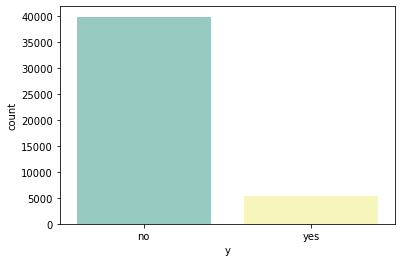

In [ ]:
sns.countplot(x = 'y', data = bankData, palette = 'Set3')
bankData['y'].value_counts()

# The data and plot shows that this dataset in a imbalance data -> need to apply the resampling method

Above plot clearly shows that the data is a imbalanced dataset. 
We will deal with this issues using oversampling. This will be discussed at the later step. 

### **Object Feature**
Anaylse the object(Categorical) feature

In [ ]:
feature_obj = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [ ]:
bankData.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
bankData.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bankData.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bankData.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bankData.housing.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
bankData.loan.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bankData.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Above information shows all the categorical variable in each of the categorical feature

Plot the countplot for each of the categorical feature to see the pattern of the data point

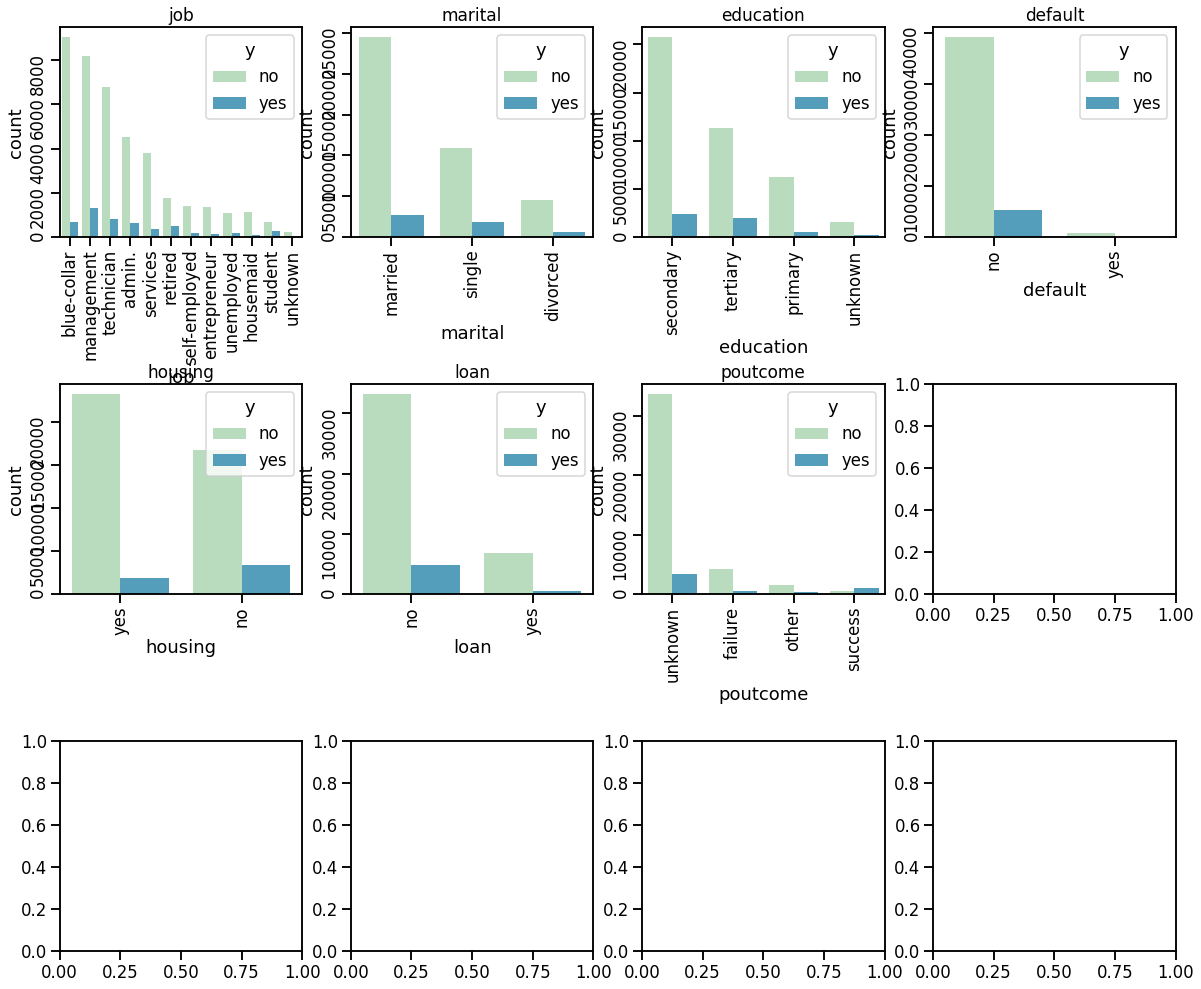

In [ ]:
# To see that how the result for each categorical feature
fig, ax = plt.subplots(3,4, figsize=(20,17))

ax = ax.ravel()
position = 0

for i in feature_obj:
    
    order = bankData[i].value_counts().index
    sns.countplot(data=bankData, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()




*   From the above plots for each categorical feature, the target feature 'y' is denominated by 'n'. In this case, we will deal with the imbalanced data using oversampling method to avoid the predictinf based on size
*   From the plot, we able to see that the group of people who are working as a management are more willing to subcribe the term deposite compare to others job type as they shows the highest amount of yes in the dataset. In relatice term, a high proportion of technician, blue-collar might be mentioned as well
* There is a big gap between the number of people with default credit and the number of people without credit. There are more people without default people involved in the dataset and more willing to subcribe the term deposite compare to people who credit in default. 
* The features overall are having the same trend. 

### **Numerical Feature**
Analyse the numerical feature

In [ ]:
feature_int = ['age', 'balance', 'duration', 'campaign', 'previous']
feature_int


['age', 'balance', 'duration', 'campaign', 'previous']

In [ ]:
skew = pd.DataFrame(bankData.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,0.684818,False
balance,8.360308,True
duration,3.144318,True
campaign,4.898650,True
previous,41.846454,True


* This output shows that only the age feature are normally distributed. 
* For others feature, the are quite badly skewed which means that those classifier which involved the distribution in their model building, cannot directly be applied on the feature as they are not normally distributed. 
* We may omit the feature or using log transformation to transform the data into less skewness and transform it into more 'normal'.

###### Plot the graph
* Investigate whether the feature are gaussian distributed or not

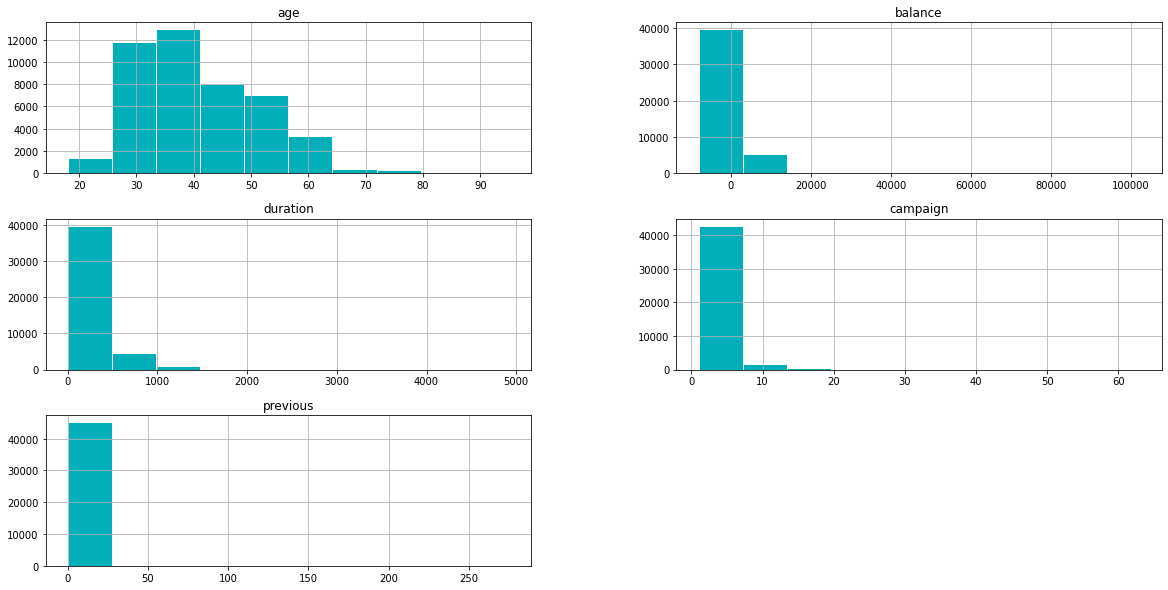

In [ ]:
bankData.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()



* Plotting above shows that only the age are normally distributed
* For others 4 features, there are more to right skewed. It may indicate that the feature contain outliers
* We able to solve the problem by apply the log transformation to transform the data into more 'normal'
 This log transformation will be discuss later.

Pairplot use to examine the correlation between each of the measurements and ahows the distribution curve for each numerical feature.


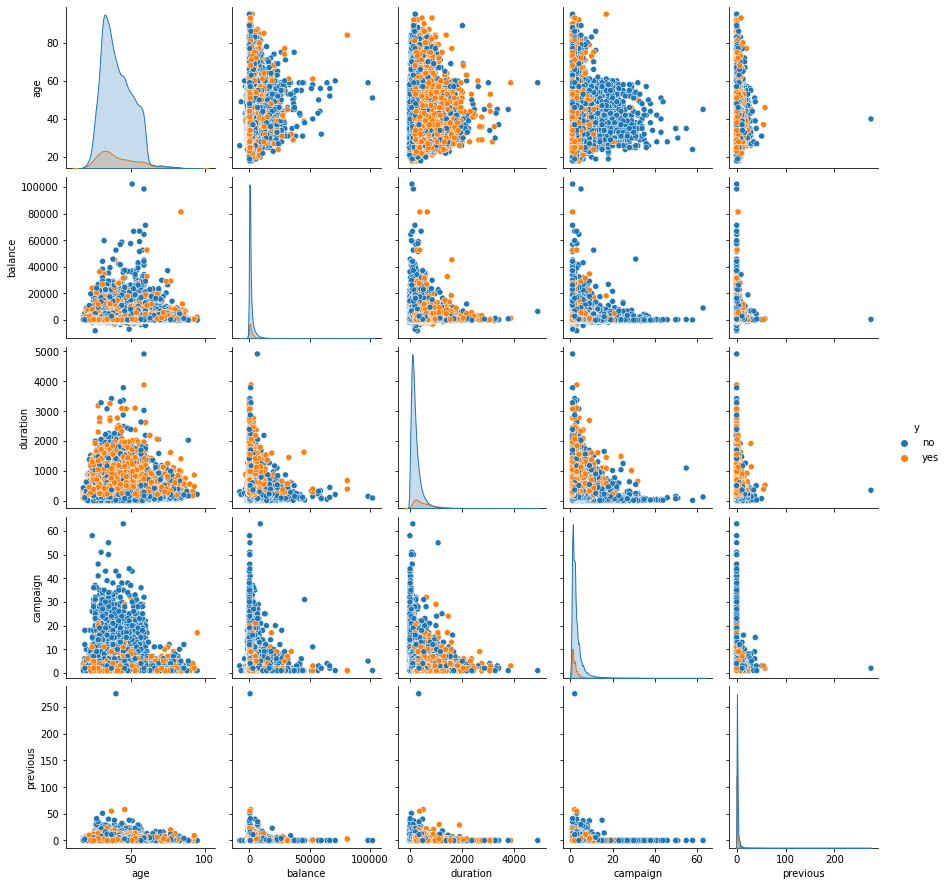

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(bankData, hue='y')

From the pairplot we are able to see that only the age is normally distributed whereras the other 4 features are right-skewed.

### **Correlation**
* Display the correlation between each of the feature and label -> Able to obtain which feature is the best to cassify them. 
* Display the correlation among the feature -> If there exist high correlation score among the 2 features, then we may be better to omit one of them

In [ ]:
feature_int = bankData.select_dtypes('int64').columns.to_list()
feature_int

['age', 'balance', 'duration', 'campaign', 'previous']

Code below is to convert the value in the label 'y' into binary number which is 1 means 'y', 0 means 'n'.

In [4]:
bankData['y'] = bankData['y'].map({'yes': 1, 'no': 0})
y=bankData['y']

Code below used:
* To check for correlation between the feature and the label
* Get correlation score between the column with x feature and y label
* To obtain which feature is the best to cassify them

In [ ]:
correlations = bankData[feature_int].corrwith(y)
correlations.sort_values(inplace=True)

correlations

# Output: Positive and negative is just different gradient.
# All the numerical faeture are not so correlated with the label


campaign   -0.073172
age         0.025155
balance     0.052838
previous    0.093236
duration    0.394521
dtype: float64

* Positive and negative score only indicate the different gradient.
* The result above shows that the duration having the highest correlation score with the label compare to others feature. But the score consider low.
* From the result, it seem like the features are not really highly correlated with the label.


A correlation matrix is a tabular data shows the correlation between pairs of variables in a given data.

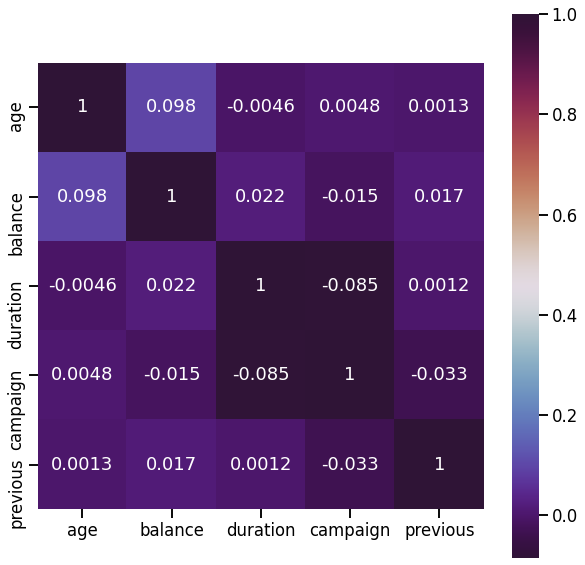

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(bankData.corr(),square=True,annot=True,cmap= 'twilight_shifted')
# Correlation among the feature

* From the heatmap, it seem likes no any of the variable are highly 

---

correlated among them

## **Data Cleaning**

#### **Check out the missing values**


*   Check if there is any missing value in the dataset
*   It is neccessary to check for the missing value as it may effect the accuracy of the prediction and the performance of the model. 
* 2 ways to handle the missing value which are imputation and drop the missing values. 




In [ ]:
# Checking which column having missing value (NaN)
bankData.isna().sum()
# bankData.isna().any()
# No missing value

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

Output shows that there is no any missing value in the dataset

# **Encoding Categorical Data**


*   There is 9 categorical feature (Job, Marital, Education, dafualt, balance, housing, loan, contact, month, poutcome) in the dataset
*   Machine Learning model only able to works completely on mathematics and number. It will cause trouble if there exist categorical variable during the process of building model
* Therefore, we need to encode these categorical variable/ feature into numbers





In [6]:
mask = bankData.dtypes == np.object # Just to abstract the column name that consist of categorical variable (Does not do any OneHot Encoding)
categorical_cols = bankData.columns[mask] # Abstract the column name directly -> will get all the columns that has string variable

# In this case, we no need to write all the column. This function will directly get all the column name that has string variable
# Because we need to do One Hot encoding for all the variable (Use this so that we can directly use the name to do OneHot encoding)

mask

age          False
job           True
marital       True
education     True
default       True
balance      False
housing       True
loan          True
duration     False
campaign     False
previous     False
poutcome      True
y            False
dtype: bool

* Result shows that except for the age, balance, duration, campaign, previous, others feature are categorical features
* y is the label and already being converted into binary number

Coding below are to show how many extra column will be formed after applying the OneHot encoder

In [7]:
num_ohc_cols = (bankData[categorical_cols]
                .apply(lambda x: x.nunique()) # Use lamda technique      
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 22 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

22

There will be new 22 columns being created after undergo the OneHor encoder

In [8]:
x = 0
bankData_ohc = bankData.copy()

# 'labelEncoder' -> To make the feature become numerical values in order for modeling purposes
le = LabelEncoder() # Make them become 1,2,3,5,5

ohc = OneHotEncoder() # Make them becom binary (0,1) ( One Hot binary plus)

# Using For loop to loop the columns 
for col in num_ohc_cols.index: # look through column name ( Get when doing using mask function)
 
    # Label Encoder
    # Integer Encode the string categories (Transform categorical data become 1,2,3,4,5,......)
    dat = le.fit_transform(bankData_ohc[col]).astype(np.int)
   
    # Remove the original column from the dataframe (All become numerical)
    # Will add in extra columns in this data_ohc after been One Hot encoded)
    bankData_ohc = bankData_ohc.drop(col, axis=1)

#------------------------------------------------------------------------------------------------------------------------------#
    # OneHot Encoder
    # One Hot Encode the data--this returns a sparse array (All become binary - true and false)
    new_dat = ohc.fit_transform(dat.reshape(-1,1)) # Then become OneHot encode
    
    # Check how many column
    n_cols = new_dat.shape[1]

    
    # Create name for the extra column generted by oneHot encoding
    # Create unique column names (Name for every new column names)
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
   

    # Create the new dataframe (Display with what dataset that ady being one hot encoded?)
    # new_df contain all the new extra columns generate by the One-Hot Encoding 
    #(Columns contain categorical value encode to the numerical value)
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=bankData_ohc.index, 
                          columns=col_names)
    
    # To display all the extra columns name form by the One-Hot Encoding
    #print(new_df.columns)

    
#------------------------------------------------------------------------------------------------------------------------------#    
    # Append(Add) the new data to the dataframe (For categorical variable that being one hot encoding)
    # Add the new extra column back to the dataBank_ohc 
    #(Take note that when applying the LabelEncoder, the columns in the data_ohc that contain categorical variable already been removed)
    bankData_ohc = pd.concat([bankData_ohc, new_df], axis=1)
    
    

In [ ]:
bankData_ohc.columns.tolist() 

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'y',
 'job_0',
 'job_1',
 'job_2',
 'job_3',
 'job_4',
 'job_5',
 'job_6',
 'job_7',
 'job_8',
 'job_9',
 'job_10',
 'job_11',
 'poutcome_0',
 'poutcome_1',
 'poutcome_2',
 'poutcome_3',
 'education_0',
 'education_1',
 'education_2',
 'education_3',
 'marital_0',
 'marital_1',
 'marital_2',
 'loan_0',
 'loan_1',
 'housing_0',
 'housing_1',
 'default_0',
 'default_1']

The output above shows all the columns including the 22 new columns that created after undergo the OneHot encoder.

In [ ]:
 print(bankData_ohc.shape[1]-bankData.shape[1])
print("Proof of the number of new columns formed after encoding")

22
Proof of the number of new columns formed after encoding


# **Splitting dataset into training and test set**
* We are going to divide the dataset into training and test set. This step is important as it able to enchance out machine learning model.
* Training set (X_train, y_train) : A subset of dataset including the output that use to train the machine learning model.
* Test set (X_test, y_test): A subset to test the machine learning model and able to let the model to predict value using the test set.




In [9]:
# Extract out the X and y variable
feature_cols = [x for x in bankData_ohc.columns if x not in 'y']
X = bankData_ohc[feature_cols] # ALl the feature are consider as x feature
y = bankData_ohc['y'] # The result are our y variable which is defined as label or target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# test_size is to set a seed for a random generator so that we able to get the same result. 

Data being splitted into 70% of training set and 30% test set

## **Log** **Transformation**
* Apply the log transformation to move the numerical feature more to normally distributed
* This will be using another name of the same dataset

In [10]:
bankTrans = bankData_ohc.copy()

Code below are actually using the log transformation for all the columns using seperable code. As there exist the negative value and zero value in the feature, so the log transformation involved step to remove the negative value and also zero value.

In [11]:
bankTrans['balance'] = np.log(bankTrans['balance'] + 1 - min(bankTrans['balance']))
bankTrans['duration'] = np.log(bankTrans['duration'] + 1 - min(bankTrans['duration']))
bankTrans['previous'] = np.log(bankTrans['previous'] + 1 - min(bankTrans['previous']))
bankTrans['campaign'] = np.log(bankTrans['campaign'] + 1 - min(bankTrans['campaign']))


In [ ]:
bankTrans.describe()

,age,balance,duration,campaign,previous,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3,education_0,education_1,education_2,education_3,marital_0,marital_1,marital_2,loan_0,loan_1,housing_0,housing_1,default_0,default_1
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,9.118653,5.171812,0.706819,0.226365,0.116985,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.108403,0.040698,0.033421,0.817478,0.151534,0.513194,0.294198,0.041074,0.115171,0.601933,0.282896,0.839774,0.160226,0.444162,0.555838,0.981973,0.018027
std,10.618762,0.212975,0.921822,0.712172,0.533111,0.321406,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.310892,0.197592,0.179735,0.386278,0.358572,0.499831,0.455687,0.198464,0.319232,0.489505,0.450411,0.366820,0.366820,0.496878,0.496878,0.133049,0.133049
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,8.998631,4.644391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,9.044050,5.198497,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,48.000000,9.153558,5.768321,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,95.000000,11.609571,8.500861,4.143135,5.620401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Feature scaling**

For bankData_ohc

In [12]:
ssc =  StandardScaler()
msc = MinMaxScaler()

In [13]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

In [14]:
X_train_ss = X_train.copy()
X_test_ss = X_test.copy()

In [15]:
num_cols = ['age', 'balance','duration', 'campaign', 'previous']

for i in num_cols:
    
    # Standard Scaling
    scaleStand = ssc.fit(X_train_ss[[i]])  # fit on training data column
    X_train_ss[i] = scaleStand.transform(X_train_ss[[i]])  # transform the training data colum
    X_test_ss[i] = scaleStand.transform(X_test_ss[[i]])  #transform the testing data column
    
    # Minmax Scaler
    scaleMinmax = msc.fit(X_train_mm[[i]])
    X_train_mm[i] = scaleMinmax.transform(X_train_mm[[i]])
    X_test_mm[i] = scaleMinmax.transform(X_test_mm[[i]])

In [ ]:
X_train_mm

,age,balance,duration,campaign,previous,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3,education_0,education_1,education_2,education_3,marital_0,marital_1,marital_2,loan_0,loan_1,housing_0,housing_1,default_0,default_1
10747,0.233766,0.077762,0.031110,0.048387,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
26054,0.493506,0.079988,0.063440,0.032258,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9125,0.363636,0.077762,0.016877,0.016129,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
41659,0.298701,0.116671,0.061407,0.000000,0.018182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4443,0.259740,0.077762,0.018300,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.337662,0.089789,0.425580,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
44732,0.064935,0.083531,0.042700,0.000000,0.003636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
38158,0.207792,0.092719,0.048597,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
860,0.194805,0.079636,0.022570,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


For dataTrans
* There is some features in this dataTrans has undergo log transformation.

Splitting data into training set and test set

In [16]:
feature_cols = [x for x in bankTrans.columns if x not in 'y']
XT = bankTrans[feature_cols]
yT = bankTrans['y']

XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size = 0.3, random_state=42)

Copy the X_train for scaling purpose

In [17]:
# Minmax scaling
XT_train_mm = XT_train.copy()
XT_test_mm = XT_test.copy()

# Standard scaling
XT_train_ss = XT_train.copy()
XT_test_ss = XT_test.copy()


In [18]:
num_cols_T = ['age', 'balance','duration', 'campaign', 'previous']

for i in num_cols_T:
    
    # Standard Scaling
    scaleStand = ssc.fit(XT_train_ss[[i]])  # fit on training data column
    XT_train_ss[i] = scaleStand.transform(XT_train_ss[[i]])  # transform the training data colum
    XT_test_ss[i] = scaleStand.transform(XT_test_ss[[i]])  #transform the testing data column
    
    # Minmax Scaler
    scaleMinmax = msc.fit(XT_train_mm[[i]])
    XT_train_mm[i] = scaleMinmax.transform(XT_train_mm[[i]])
    XT_test_mm[i] = scaleMinmax.transform(XT_test_mm[[i]])

In [ ]:
XT_train_mm

,age,balance,duration,campaign,previous,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3,education_0,education_1,education_2,education_3,marital_0,marital_1,marital_2,loan_0,loan_1,housing_0,housing_1,default_0,default_1
10747,0.233766,0.443804,0.592523,0.334600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
26054,0.493506,0.449378,0.675955,0.265165,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9125,0.363636,0.443804,0.521220,0.167300,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
41659,0.298701,0.525922,0.672136,0.000000,0.318796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4443,0.259740,0.443804,0.530636,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.337662,0.472437,0.899536,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
44732,0.064935,0.457982,0.629567,0.000000,0.123327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
38158,0.207792,0.478906,0.644716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
860,0.194805,0.448505,0.555061,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### **Oversampling - SMOTE**
In this approach, we use oversampling technique which is Synthetic Minority Oversampling Technique, or SMOTE for short.
* SMOTE creates new instances of the minority class by creating convex combintations of neighboring instance. It helps to overcome the overfitting problem posed by random oversampling.

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
### Apply SMOTE for the dataData_ohc
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_mm_smote, y_train_mm_smote = sm.fit_resample(X_train_mm, y_train) # Minmax scaler
X_train_ss_smote, y_train_ss_smote = sm.fit_resample(X_train_ss, y_train) # Standard scaler


### Apply SMOTE for the transformation data (dataTrans)
XT_train_smote, yT_train_smote = sm.fit_resample(XT_train, yT_train)
XT_train_mm_smote, yT_train_mm_smote = sm.fit_resample(XT_train_mm, yT_train) # Minmax scaler + transformation
XT_train_ss_smote, yT_train_mm_smote = sm.fit_resample(XT_train_ss, yT_train) # Standard scaler + transformation


print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))



Before OverSampling, counts of label '1': 3691
Before OverSampling, counts of label '0': 27956 

After OverSampling, the shape of train_X: (55912, 34)
After OverSampling, the shape of train_y: (55912,) 

After OverSampling, counts of label '1': 27956
After OverSampling, counts of label '0': 27956


# **Train Model**

**In the process of building model, we are using the GridSearchCV to obtain the optimal parameter in order to get the best model**


## **K Nearest Neighbors**
* KNN algorithmn is a non-parametric supervised algorithmn. It does notmake any assumption on underlying data
* It mostly use for classification proeblems
* It use data and classify new data points based on similarity measures such as distance function. The classification is based on the majority vote to its neighbors.
* KNN required to be normalize to eliminate noise and can make the range small

##### **KNN with GridSearchCV**
* We set the number of neighbors is from 1 to 30 (n_neigbors = range(1-30))
* The weights option refer to the weight function used in prediction. 


In [20]:
k_range = list(range(1, 31))
weight_options = ['distance','uniform']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knngrid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

#### Non scaled data (knn)

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn = knngrid.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn =knn.predict_proba(X_test)

In [ ]:
# Shows the best parameter use to obtain the optimal model
knn.best_params_

{'n_neighbors': 30, 'weights': 'uniform'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn.best_score_ 

0.8875723549437792

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision Score: ", precision_score(y_test, y_pred_knn))
print("Recall Score: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8860218224712474
Precision Score:  0.5596330275229358
Recall Score:  0.15269086357947434
F1 Score:  0.23992133726647
roc-auc is 0.804


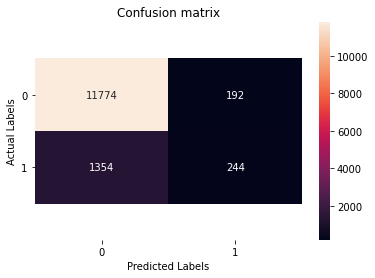

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.15      0.24      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn))

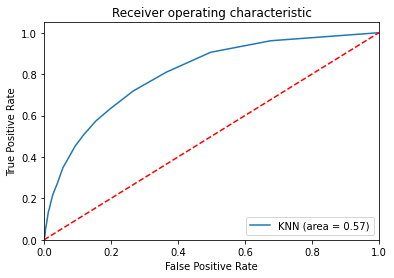

In [ ]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_NonScaledData_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)


#### Data + Minmax scaler

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_mm = knngrid.fit(X_train_mm, y_train)
y_pred_knn_mm = knn_mm.predict(X_test_mm)
y_pred_knn_mm

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_prob_knn_mm =knn_mm.predict_proba(X_test_mm)

In [ ]:
knn_mm.best_params_

{'n_neighbors': 18, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_mm.best_score_ 

0.8940815529308279

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_mm))
print("Precision Score: ", precision_score(y_test, y_pred_knn_mm))
print("Recall Score: ", recall_score(y_test, y_pred_knn_mm))
print("F1 Score: ", f1_score(y_test, y_pred_knn_mm))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn_mm[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8916986139781775
Precision Score:  0.6087689713322091
Recall Score:  0.22590738423028786
F1 Score:  0.3295298950251027
roc-auc is 0.832


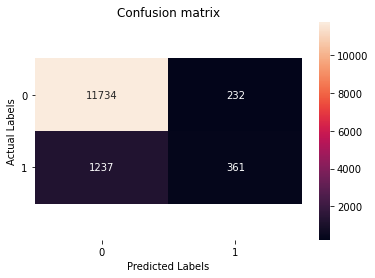

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.61      0.23      0.33      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_mm), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn_mm))

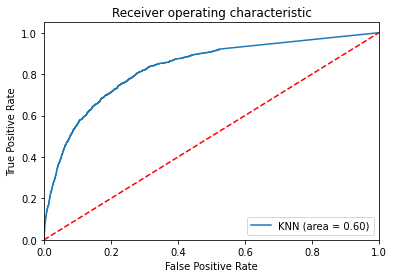

In [ ]:
knn_mm_roc_auc = roc_auc_score(y_test, knn_mm.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, knn_mm.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_mm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_minmax_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_mm, file)


#### Data + Standard Scaler

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_ss = knngrid.fit(X_train_ss, y_train)
y_pred_knn_ss = knn_ss.predict(X_test_ss)
y_pred_knn_ss

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_prob_knn_ss =knn_ss.predict_proba(X_test_ss)

In [ ]:
knn_ss.best_params_

{'n_neighbors': 29, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_ss.best_score_ 

0.8965463823214537

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_ss))
print("Precision Score: ", precision_score(y_test, y_pred_knn_ss))
print("Recall Score: ", recall_score(y_test, y_pred_knn_ss))
print("F1 Score: ", f1_score(y_test, y_pred_knn_ss))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn_ss[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set


Accuracy:  0.8947213211442052
Precision Score:  0.6203966005665722
Recall Score:  0.27409261576971217
F1 Score:  0.38020833333333337
roc-auc is 0.867


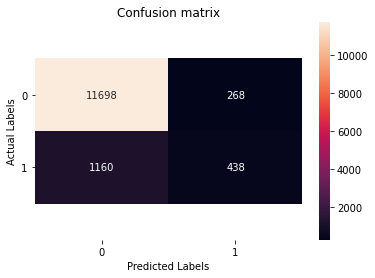

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.62      0.27      0.38      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.63      0.66     13564
weighted avg       0.88      0.89      0.88     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_ss), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn_ss))


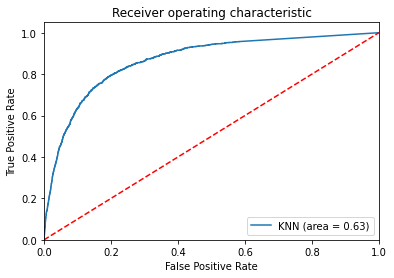

In [ ]:
knn_ss_roc_auc = roc_auc_score(y_test, knn_ss.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, knn_ss.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_ss_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_ss_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_ss, file)


Non scaled data + SMOTE

In [ ]:
knn_smote = knngrid.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)
y_pred_knn_smote

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_pred_prob_knn_smote =knn_smote.predict_proba(X_test)

In [ ]:
knn_smote.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_smote.best_score_ 

0.8731577075502326

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_smote))
print("Precision Score: ", precision_score(y_test, y_pred_knn_smote))
print("Recall Score: ", recall_score(y_test, y_pred_knn_smote))
print("F1 Score: ", f1_score(y_test, y_pred_knn_smote))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn_smote[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.7732232379828959
Precision Score:  0.251846877098724
Recall Score:  0.4693366708385482
F1 Score:  0.3277972027972028
roc-auc is 0.681


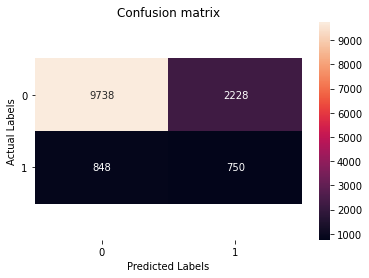

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     11966
           1       0.25      0.47      0.33      1598

    accuracy                           0.77     13564
   macro avg       0.59      0.64      0.60     13564
weighted avg       0.84      0.77      0.80     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn_smote))

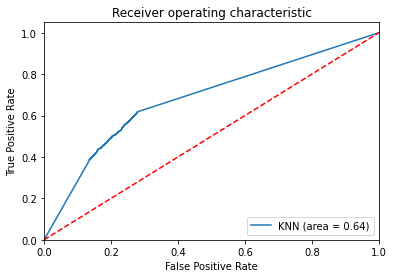

In [ ]:
knn_smote_roc_auc = roc_auc_score(y_test, knn_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_smote_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_smote, file)


#### Minmax Scaler + SMOTE

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_mm_smote = knngrid.fit(X_train_mm_smote, y_train_smote)
y_pred_knn_mm_smote = knn_mm_smote.predict(X_test_mm)
y_pred_knn_mm_smote

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred_prob_knn_mm_smote =knn_mm_smote.predict_proba(X_test_mm)


In [ ]:
knn_mm_smote.best_params_

{'n_neighbors': 1, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_mm_smote.best_score_ 

0.9073545386532466

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_mm_smote))
print("Precision Score: ", precision_score(y_test, y_pred_knn_mm_smote))
print("Recall Score: ", recall_score(y_test, y_pred_knn_mm_smote))
print("F1 Score: ", f1_score(y_test, y_pred_knn_mm_smote))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn_mm_smote[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set


Accuracy:  0.8239457387201415
Precision Score:  0.33361415332771693
Recall Score:  0.4956195244055069
F1 Score:  0.3987915407854985
roc-auc is 0.682


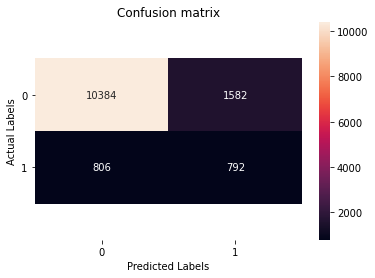

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11966
           1       0.33      0.50      0.40      1598

    accuracy                           0.82     13564
   macro avg       0.63      0.68      0.65     13564
weighted avg       0.86      0.82      0.84     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_mm_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn_mm_smote))

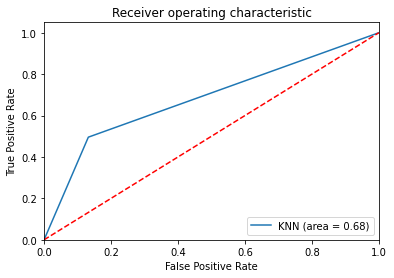

In [ ]:
knn_mm_smote_roc_auc = roc_auc_score(y_test, knn_mm_smote.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, knn_mm_smote.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_mm_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_minmax_smote_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_mm_smote, file)


#### Standard scaler + SMOTE

In [ ]:
knn_ss_smote = knngrid.fit(X_train_ss_smote, y_train_ss_smote)
y_pred_knn_ss_smote = knn_smote.predict(X_test_ss)
y_pred_knn_ss_smote

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
y_pred_prob_knn_ss_smote =knn_ss_smote.predict_proba(X_test_ss)

In [ ]:
knn_ss_smote.best_params_

{'n_neighbors': 1, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_ss_smote.best_score_ 

0.9253291412040399

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_ss_smote))
print("Precision Score: ", precision_score(y_test, y_pred_knn_ss_smote))
print("Recall Score: ", recall_score(y_test, y_pred_knn_ss_smote))
print("F1 Score: ", f1_score(y_test, y_pred_knn_ss_smote))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_knn_ss_smote[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8385432025951047
Precision Score:  0.3619402985074627
Recall Score:  0.4856070087609512
F1 Score:  0.4147514698022448
roc-auc is 0.686


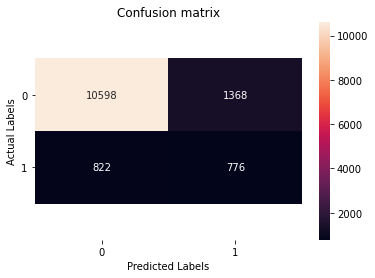

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11966
           1       0.36      0.49      0.41      1598

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.86      0.84      0.85     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn_ss_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_knn_ss_smote))

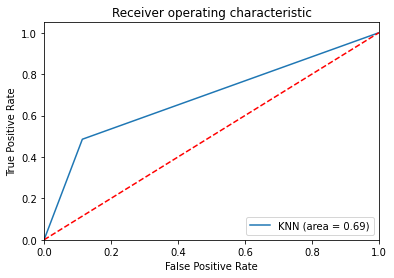

In [ ]:
knn_ss_smote_roc_auc = roc_auc_score(y_test, knn_ss_smote.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, knn_ss_smote.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_ss_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_ss_smote_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_ss_smote, file)


#### Non scaled data + Log transformation

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_trans = knngrid.fit(XT_train, yT_train)

In [ ]:
y_pred_knn_trans = knn_trans.predict(XT_test)
y_pred_prob_knn_trans =knn_trans.predict_proba(X_test)

In [ ]:
knn_trans.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
 # The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_trans.best_score_

0.892722833307998

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8907401946328517
Precision Score:  0.6183673469387755
Recall Score:  0.18961201501877348
F1 Score:  0.2902298850574713
roc-auc is 0.576


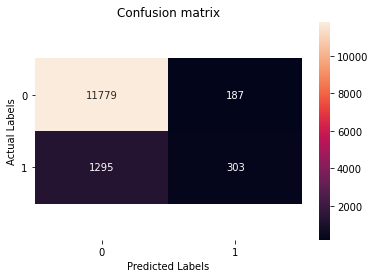

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.62      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_trans))

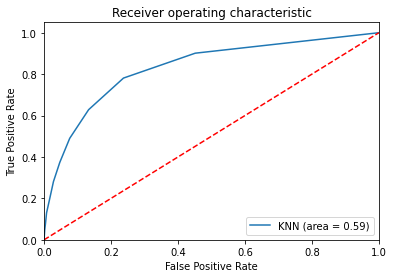

In [ ]:
knn_trans_roc_auc = roc_auc_score(yT_test, knn_trans.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, knn_trans.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_log_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_trans, file)


#### Minmax scaler + Transformation

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_mm_trans = knngrid.fit(XT_train_mm, yT_train)


In [ ]:
y_pred_knn_mm_trans = knn_mm_trans.predict(XT_test_mm)
y_pred_prob_knn_mm_trans =knn_mm_trans.predict_proba(XT_test_mm)

In [ ]:
knn_mm_trans.best_params_

{'n_neighbors': 28, 'weights': 'distance'}

In [ ]:
 # The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_mm_trans.best_score_

0.8932914638277076

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_mm_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_mm_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_mm_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_mm_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_mm_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8914037157180773
Precision Score:  0.6326963906581741
Recall Score:  0.18648310387984982
F1 Score:  0.28806186563557273
roc-auc is 0.839


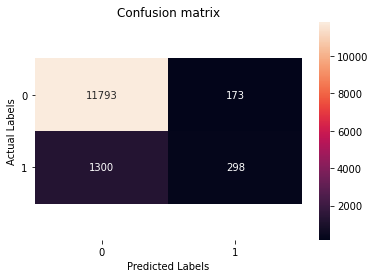

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.63      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_mm_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_mm_trans))

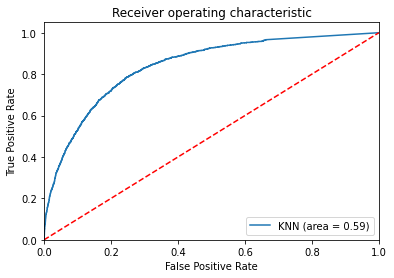

In [ ]:
knn_mm_trans_roc_auc = roc_auc_score(yT_test, knn_mm_trans.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, knn_mm_trans.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_mm_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_mm_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_mm_trans, file)


#### Standard Scaler + Transformation

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_ss_trans = knngrid.fit(XT_train_ss, yT_train)

In [ ]:
y_pred_knn_ss_trans = knn_ss_trans.predict(XT_test_ss)
y_pred_prob_knn_ss_trans =knn_ss_trans.predict_proba(XT_test_ss)

In [ ]:
knn_ss_trans.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
 # The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_ss_trans.best_score_

0.892722833307998

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_ss_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_ss_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_ss_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_ss_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_ss_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8907401946328517
Precision Score:  0.6183673469387755
Recall Score:  0.18961201501877348
F1 Score:  0.2902298850574713
roc-auc is 0.830


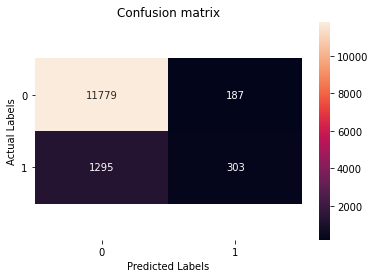

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.62      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_ss_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_ss_trans))


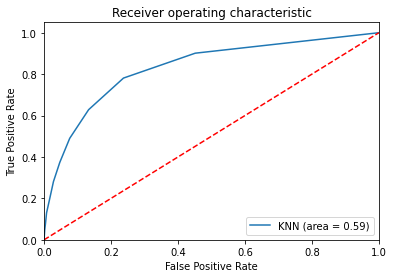

In [ ]:
knn_ss_trans_roc_auc = roc_auc_score(yT_test, knn_ss_trans.predict(XT_test_ss))
fpr, tpr, thresholds = roc_curve(yT_test, knn_ss_trans.predict_proba(XT_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_ss_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_ss_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_ss_trans, file)


#### Non scaled data + SMOTE + Log Transformation

In [ ]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_smote_trans = knngrid.fit(XT_train_smote, yT_train_smote)


In [ ]:
y_pred_knn_smote_trans = knn_smote_trans.predict(XT_test)
y_pred_prob_knn_smote_trans =knn_smote_trans.predict_proba(XT_test)

In [ ]:
knn_smote_trans.best_params_


{'n_neighbors': 1, 'weights': 'distance'}

In [ ]:
# The average of all the cv folds for a single combination of the parameters you specify in the test params
knn_smote_trans.best_score_ 

0.9336815166452554

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_smote_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_smote_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_smote_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_smote_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_smote_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set

Accuracy:  0.8386906517251548
Precision Score:  0.34699170124481327
Recall Score:  0.418648310387985
F1 Score:  0.37946681792399317
roc-auc is 0.657


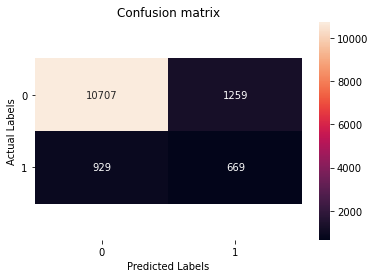

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11966
           1       0.35      0.42      0.38      1598

    accuracy                           0.84     13564
   macro avg       0.63      0.66      0.64     13564
weighted avg       0.85      0.84      0.85     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_smote_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_smote_trans))

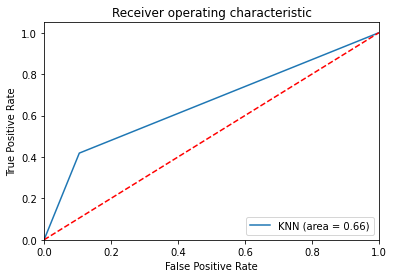

In [ ]:
knn_smote_trans_roc_auc = roc_auc_score(yT_test, knn_smote_trans.predict(XT_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_smote_trans.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_smote_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_smote_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_smote_trans, file)


#### Minmax Scaler + SMOTE + Log Transformation

In [ ]:
knn_mm_smote_trans = knngrid.fit(XT_train_mm_smote, yT_train_smote)

In [ ]:
y_pred_knn_mm_smote_trans = knn_mm_smote_trans.predict(XT_test_mm)
y_pred_prob_knn_mm_smote_trans =knn_mm_smote_trans.predict_proba(XT_test_mm)


In [ ]:
knn_mm_smote_trans.best_params_

{'n_neighbors': 1, 'weights': 'distance'}

In [ ]:
knn_mm_smote_trans.best_score_ 

0.9336815166452554

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_mm_smote_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_mm_smote_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_mm_smote_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_mm_smote_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_mm_smote_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set


Accuracy:  0.8386906517251548
Precision Score:  0.34699170124481327
Recall Score:  0.418648310387985
F1 Score:  0.37946681792399317
roc-auc is 0.657


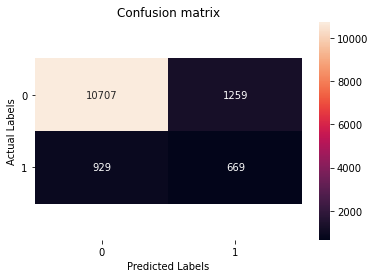

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11966
           1       0.35      0.42      0.38      1598

    accuracy                           0.84     13564
   macro avg       0.63      0.66      0.64     13564
weighted avg       0.85      0.84      0.85     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_mm_smote_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_mm_smote_trans))

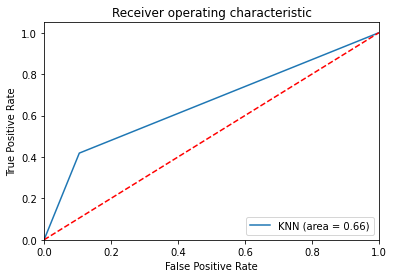

In [ ]:
knn_mm_smote_trans_roc_auc = roc_auc_score(yT_test, knn_mm_smote_trans.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, knn_mm_smote_trans.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_mm_smote_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_mm_smote_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_mm_smote_trans, file)


#### Standard Scaler + SMOTE + Log Transformation

In [21]:
# Means that grid search help us to test which parameter give out the best fit (?)
knn_ss_smote_trans = knngrid.fit(XT_train_ss_smote, yT_train_smote)

In [22]:
y_pred_knn_ss_smote_trans = knn_ss_smote_trans.predict(XT_test_ss)
y_pred_prob_knn_ss_smote_trans =knn_ss_smote_trans.predict_proba(XT_test_ss)

In [23]:
knn_ss_smote_trans.best_params_

{'n_neighbors': 1, 'weights': 'distance'}

In [24]:
knn_ss_smote_trans.best_score_ 

0.9289955323345204

In [25]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_knn_ss_smote_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_knn_ss_smote_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_knn_ss_smote_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_knn_ss_smote_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_knn_ss_smote_trans[:,1])))
# Refer to previous practicals to obtain the performance metrics for training set and testing set


Accuracy:  0.83891182542023
Precision Score:  0.35563207083128384
Recall Score:  0.4524405506883605
F1 Score:  0.3982374001652438
roc-auc is 0.671


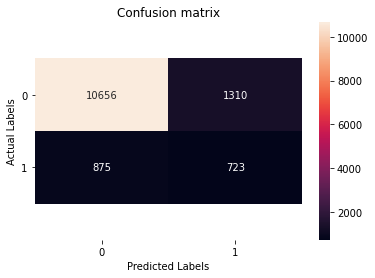

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11966
           1       0.36      0.45      0.40      1598

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [26]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_knn_ss_smote_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_knn_ss_smote_trans))


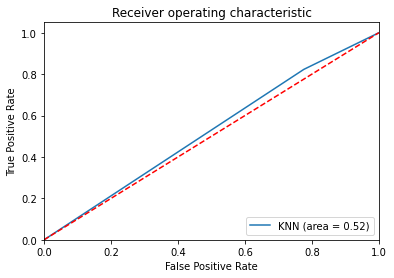

In [27]:
knn_ss_smote_trans_roc_auc = roc_auc_score(yT_test, knn_ss_smote_trans.predict(X_test))
fpr, tpr, thresholds = roc_curve(yT_test, knn_ss_smote_trans.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_ss_smote_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_ss_smote_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_ss_smote_trans, file)


###### **Note:** 
Evaluation method:

Confusion Matric:
* In the Confusion matric, the 1st row shows the true postive and false positive, 2nd row shows the false negative and true negative of the prediction. 
For example: 
 1. Non scaled data:  
    * There is 244 of true positive which means that there are 244 of data are correct predicted as no(0) and 11774 of the data are predicted correctly as yes(1)
    * Then, there will be 192 of data are wrongly predicted as no(0) and 1354 of data are wrongly predicted as no(1)

Classification Report
* Accuracy is the ratio of the correctly labeled subjects to the whole pool of subjects.
* The precision use to identify the only positive instances. It refer to how sure you are of your true positive. 
* Recall refer to how sure that you are not missing any true positive. It only will look at the actual positive row. Choose recall when the idea of false positive is better than false negative
* F1 score similar as accuracy but it is a better metric when there are imbalanced classes as in the above case. F1 Score is the weighted average of Precision and Recall


#### ***Conclusion:***

We used 12 different pattern of data to train the knn model:
Non scaled data, 
Minmax scaling data,
Standard scaling data, 
Non scaled data with smote, 
Minmax scaling data with smote, 
Standard scaling data with smote, 
Non scaling data with log transformation, 
Minmax scaling data with log transformation, 
Standard scaling data with log transformation, 
Non scaling data with smote and log transformation, 
Minmax scaling data with smote and log transformation,
Standard scaling data with smote and log transformation 

* In this report, due to our dataset are imbalanced data, so we cannot use accuracy to measure the performance of the model. We directly refer to the ROC-AUC (Area under the curve) to determine the optimal knn model that build and train by different pattern of data. 
* Among all the different pattern of data, we conclude that the data that applied standard scaling, oversampling gave the larger ROC curve area which is 0.69. From the overall the non scaled data without any feature engineering give the smallest curve area, and then follow by the two type of data that go through feature scaling and log transformation (Minmax scaling data with log and standard scaling data with log) which get 0.59 for both data.

* From the overall result in the confusion matrix, the f1 score that are more suitable to use for evaluation compare to accuracy shows a quite low value for every different pattern of data in building the knn model. A low F1 score is an indication of both poor precision and poor recall. The highest f1 score is 0.41 belongs to the model that applied Standard scaling and SMOTE. 

# **Decision Tree**
* It is a tree-structure classifier.
* It graphically represents of all the possible solution to a decision based on certain conditions.
* It contain nodes where every nodes has it own condition.
* In the a decision tree, there are two nodes which are the Decision node and leaf node. 
 * Decision nodes => Use to make any decision and have multiple branches
 * Leaf nodes => The output of those decisions and do not contain any branches

##### **Decision Tree with GridSearchCV**
* max_depth => Hyperparameter to tune in a Decision Tree
  * Indicates how deep the decision tree can be 
  * Deeper the tree, more splites it has and capture more information about the data
  * Large depth values will casue the decision tree overfits
* max_feature => Represents the number of features to consider when looking for the best split
  * Either specify a number to denote the max_features at each split or a fraction to denote the precentage of features to consider while making a split

In [ ]:
# start from 1 to 33, increase by 2
param_grid = {'criterion':['gini','entropy'],'max_depth':range(1, 33, 2),
              'max_features': range(1, 30)}

dtgr = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)



#### Non scaled data

In [ ]:
dt = dtgr.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)

In [ ]:
dt.best_score_ 

0.9020761423942598

In [ ]:
dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 21,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred_dt))
print("Precision Score: ", precision_score(y_test, y_pred_dt))
print("Recall Score: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_dt)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_prob_dt[:,1])))


Accuracy:  0.897670303745208
Precision Score:  0.6141304347826086
Recall Score:  0.35356695869837296
F1 Score:  0.44876886417791895
accuracy is 0.898
roc-auc is 0.865


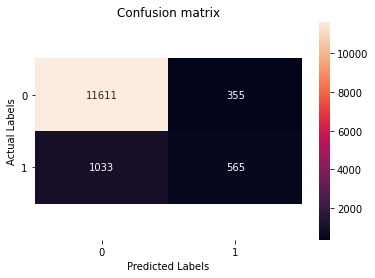

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.61      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_dt))

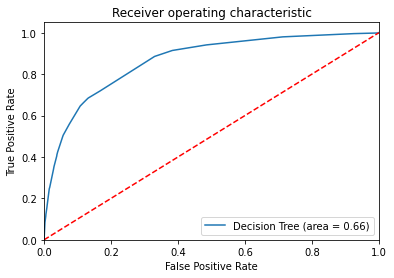

In [ ]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()


In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "dt_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(dt, file)


#### Non scaled data + SMOTE

In [ ]:
dt_smote = dtgr.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred_dt_smote = dt_smote.predict(X_test)
y_prob_dt_smote = dt_smote.predict_proba(X_test)

In [ ]:
dt_smote.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 13,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred_dt_smote))
print("Precision Score: ", precision_score(y_test, y_pred_dt_smote))
print("Recall Score: ", recall_score(y_test, y_pred_dt_smote))
print("F1 Score: ", f1_score(y_test, y_pred_dt_smote))
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_dt_smote)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_dt_smote)))

Accuracy:  0.876658802713064
Precision Score:  0.47232472324723246
Recall Score:  0.4005006257822278
F1 Score:  0.43345750084659673
accuracy is 0.877
roc-auc is 0.670


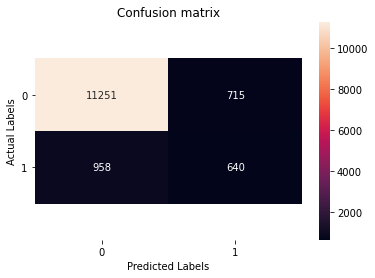

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11966
           1       0.47      0.40      0.43      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.67      0.68     13564
weighted avg       0.87      0.88      0.87     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_dt_smote))

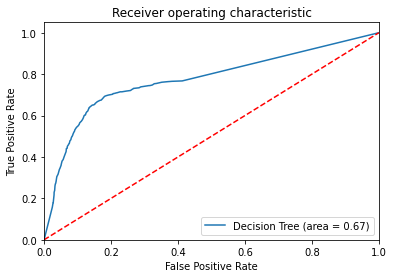

In [ ]:
dt_smote_roc_auc = roc_auc_score(y_test, dt_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()


#### Non scaled Data + Log Transformation

In [ ]:
dt_trans = dtgr.fit(XT_train, yT_train)
y_pred_dt_trans = dt_trans.predict(XT_test)
y_prob_dt_trans = dt_trans.predict_proba(XT_test)

In [ ]:
dt_trans.best_estimator_.get_params()

In [ ]:
print("Accuracy: ", accuracy_score(yT_test,y_pred_dt_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_dt_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_dt_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_dt_trans))
print('accuracy is {:.3f}'.format(accuracy_score(yT_test,y_pred_dt_trans)))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_prob_dt_trans[:,1])))

Accuracy:  0.897670303745208
Precision Score:  0.6141304347826086
Recall Score:  0.35356695869837296
F1 Score:  0.44876886417791895
accuracy is 0.898
roc-auc is 0.865


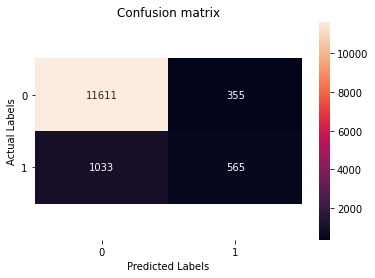

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.61      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_dt_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_dt_trans))

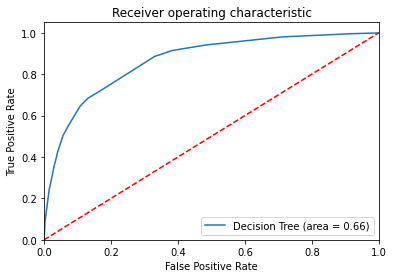

In [ ]:
dt_trans_roc_auc = roc_auc_score(yT_test, dt_trans.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, dt_trans.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "dt_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(dt_trans, file)


#### Non scaled data + SMOTE + Log Transformation

In [ ]:
dt_trans_smote = dtgr.fit(XT_train_smote, yT_train_smote)
y_pred_dt_trans_smote = dt_trans_smote.predict(XT_test)
y_prob_dt_trans_smote = dt_trans_smote.predict_proba(XT_test)

In [ ]:
dt_trans_smote.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 31,
 'max_features': 7,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
print("Accuracy: ", accuracy_score(yT_test,y_pred_dt_trans_smote))
print("Precision Score: ", precision_score(yT_test, y_pred_dt_trans_smote))
print("Recall Score: ", recall_score(yT_test, y_pred_dt_trans_smote))
print("F1 Score: ", f1_score(yT_test, y_pred_dt_trans_smote))
print('accuracy is {:.3f}'.format(accuracy_score(yT_test,y_pred_dt_trans_smote)))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_prob_dt_trans_smote[:,1])))

Accuracy:  0.8400914184606311
Precision Score:  0.3635929288103201
Recall Score:  0.4762202753441802
F1 Score:  0.41235437550799237
accuracy is 0.840
roc-auc is 0.685


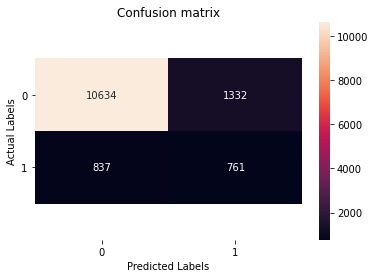

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11966
           1       0.36      0.48      0.41      1598

    accuracy                           0.84     13564
   macro avg       0.65      0.68      0.66     13564
weighted avg       0.86      0.84      0.85     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_dt_trans_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_dt_trans_smote))


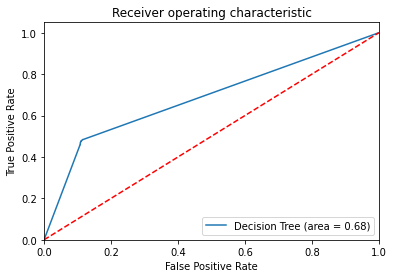

In [ ]:
dt_trans_smote_roc_auc = roc_auc_score(yT_test, dt_trans_smote.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, dt_trans_smote.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_trans_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "dt_smote_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(dt_trans_smote, file)


###### Note: 
Decision trees do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

Therefore, there will only has 4 different pattern of data use to train Decision tree model which are:
Non scaled data, Non scaled data with smote, Non scaling data with log transformation, Non scaling data with smote and log transformation

#### ***Conclusion***
From the overall ROC- AUC value, there are almost same value which the different between each of them is only 0.01. The optimal decision tree model is the model that used a balanced data with log transformation which is 0.68. The worst model is the model that used imbalanced data without any any feature engireering. This indicate that it is better using a balanced data to obtain a stronger model.

# Random Forest


Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
* There are 2 assumptions for the random forest: 
 * There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
 * The predictions from each tree must have very low correlations.

#### Random Forest with GridSearchGrid

For the gridSearchCV, we test for the 5 value of n_estimators whihc is 10, 20, 30, 40 ,50. It means that we want to see how many numbers of tree in the forest able to get best performance for the prediction. Another inmportant parameter are the max _features, max_depth and criterion. These few paremeter are be setted to avoid the overfitting of the data.

In [ ]:
param_grid = { 
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9,10,11,12],
    'criterion' :['gini', 'entropy']
}

GR_rfc = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)

#### Non scaled data

In [ ]:
grRfc = GR_rfc.fit(X_train, y_train)

In [ ]:
grRfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 30}

In [ ]:
y_pred_rfc=grRfc.predict(X_test)
y_pred_prob_rfc = grRfc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))
print("Precision Score: ", precision_score(y_test, y_pred_rfc))
print("Recall Score: ", recall_score(y_test, y_pred_rfc))
print("F1 Score: ", f1_score(y_test, y_pred_rfc))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rfc[:,1])))

Accuracy:  0.8973754054851076
Precision Score:  0.6688524590163935
Recall Score:  0.2553191489361702
F1 Score:  0.36956521739130427
roc-auc is 0.887


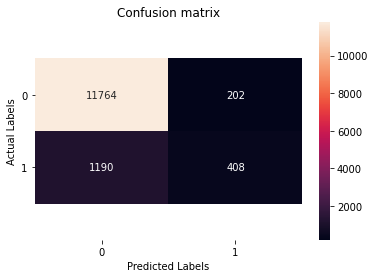

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.67      0.26      0.37      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_rfc))

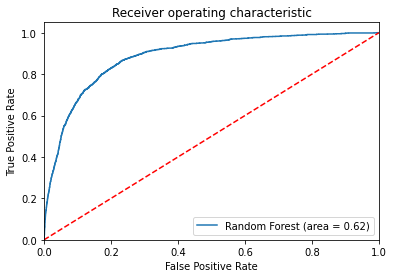

In [ ]:
grRfc_roc_auc = roc_auc_score(y_test, grRfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grRfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % grRfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "rfc_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grRfc, file)


#### Non scaled data + SMOTE

In [ ]:
grRfc_smote = GR_rfc.fit(X_train_smote, y_train_smote)

In [ ]:
grRfc_smote.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 20}

In [ ]:
y_pred_rfc_smote=grRfc_smote.predict(X_test)
y_pred_prob_rfc_smote = grRfc_smote.predict_proba(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc_smote))
print("Precision Score: ", precision_score(y_test, y_pred_rfc_smote))
print("Recall Score: ", recall_score(y_test, y_pred_rfc_smote))
print("F1 Score: ", f1_score(y_test, y_pred_rfc_smote))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rfc_smote[:,1])))

Accuracy:  0.8953848422294308
Precision Score:  0.6018202502844141
Recall Score:  0.3310387984981227
F1 Score:  0.42712959224868796
roc-auc is 0.880


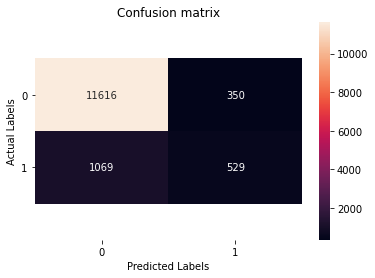

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.33      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rfc_smote), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred_rfc_smote))

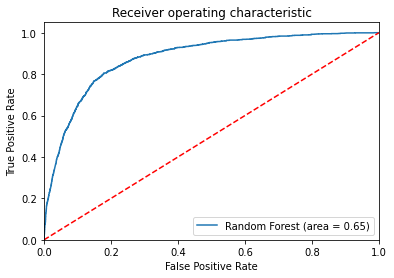

In [ ]:
grRfc_roc_auc = roc_auc_score(y_test, grRfc_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grRfc_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % grRfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()


In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "rfc_smote_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grRfc_smote, file)


#### Non scaled data + Log Transformation

In [ ]:
grRfc_trans = GR_rfc.fit(XT_train, yT_train)

In [ ]:
y_pred_rfc_trans=grRfc_trans.predict(XT_test)
y_pred_prob_rfc_trans = grRfc_trans.predict_proba(XT_test)

In [ ]:
grRfc_trans.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 30}

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_rfc_trans))
print("Precision Score: ", precision_score(yT_test, y_pred_rfc_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_rfc_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_rfc_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_rfc_trans[:,1])))

Accuracy:  0.8972279563550575
Precision Score:  0.6677631578947368
Recall Score:  0.25406758448060074
F1 Score:  0.3680870353581142
roc-auc is 0.887


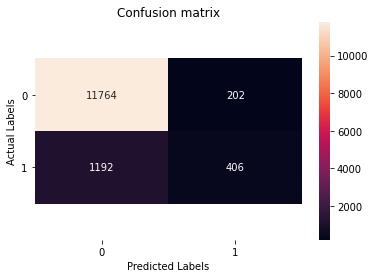

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.67      0.25      0.37      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_rfc_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_rfc_trans))


In [ ]:
grRfc_trans_roc_auc = roc_auc_score(yT_test, grRfc_trans.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, grRfc_trans.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % grRfc_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory
Pkl_Filename = "rfc_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grRfc_trans, file)


#### Non scaled data + SMOTE + Log Transformation

In [ ]:
grRfc_smote_trans = GR_rfc.fit(XT_train_smote, yT_train_smote)

In [ ]:
y_pred_rfc_smote_trans = grRfc_smote_trans.predict(XT_test)
y_pred_prob_rfc_smote_trans = grRfc_smote_trans.predict_proba(XT_test)

In [ ]:
grRfc_smote_trans.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
print("Accuracy: ", accuracy_score(yT_test, y_pred_rfc_smote_trans))
print("Precision Score: ", precision_score(yT_test,y_pred_rfc_smote_trans))
print("Recall Score: ", recall_score(yT_test, y_pred_rfc_smote_trans))
print("F1 Score: ", f1_score(yT_test, y_pred_rfc_smote_trans))
print('roc-auc is {:.3f}'.format(roc_auc_score(yT_test,y_pred_prob_rfc_smote_trans[:,1])))

Accuracy:  0.8474638749631377
Precision Score:  0.41716496658459373
Recall Score:  0.7421777221526908
F1 Score:  0.5341139383021841
roc-auc is 0.885


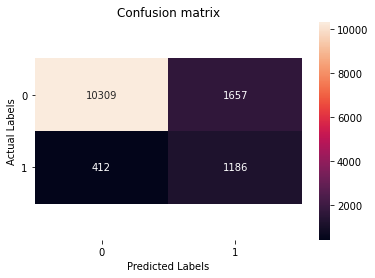

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11966
           1       0.42      0.74      0.53      1598

    accuracy                           0.85     13564
   macro avg       0.69      0.80      0.72     13564
weighted avg       0.90      0.85      0.86     13564



In [ ]:
plt.title("Confusion matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_rfc_smote_trans), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(yT_test, y_pred_rfc_smote_trans))

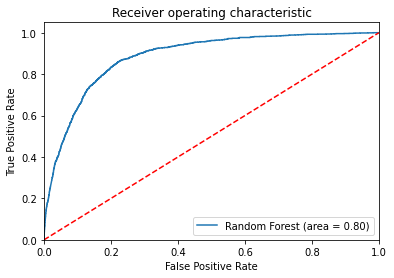

In [ ]:
grRfc_smote_trans_roc_auc = roc_auc_score(yT_test, grRfc_smote_trans.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, grRfc_smote_trans.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % grRfc_smote_trans_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "rfc_smote_trans_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grRfc_smote_trans, file)


##### Note: Random Forest is a tree-based model and hence does not require feature scaling. This algorithm requires partitioning, even if you apply Normalization then also> the result would be the same. 

Therefore, there will only has 4 different pattern of data use to train Decision tree model which are:
Non scaled data, Non scaled data with smote, Non scaling data with log transformation, Non scaling data with smote and log transformation

#### Conclusion:
From the result of AUC value, we conclude that the data which had been oversamplied and applied the log transformation give able to build a best performance of the random forest model comapre to the others 3 data. It give a value of 0.80 that has a larger gap value between others 3 type of random forest model. Besides, the highest f1-score is 0.53 which is obtained from the model with the balance data with log transformation. 

## **Logistic Regression**

* Logistic Regression is a supervised machine learning algorithms
* It  uses a logistic function to model a binary dependent variable, although many more complex extensions exist
* It estimates the parameters of a logistic model
* A binary logistic model has a dependent variable with two possible values, such as subscribe/unsubscribe the term deposit which is represented by an indicator variable, where the two values are labeled "0" and "1"

### GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
param_grid = {'C': np.logspace(-4, 4, 50), 'penalty':['l1','l2']}
clf = GridSearchCV(LogisticRegression(random_state=42), param_grid,cv=5, verbose=0,n_jobs=-1)
 

### Non scaled data

In [ ]:
lg1 = clf.fit(X_train, y_train)

In [ ]:
lg1.best_params_

{'C': 0.05963623316594643, 'penalty': 'l2'}

In [ ]:
logreg1 = LogisticRegression(C=0.05963623316594643, penalty='l2', random_state=42)
logreg1.fit(X_train, y_train)
y_pred1 = logreg1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(y_test, y_pred1))

Confusion Matrix:
 [[11730   236]
 [ 1237   361]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.60      0.23      0.33      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



Confusion Matrix:

11700 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
474 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
266 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
1124 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.89.

Class(0)

Precision value is 0.91 which tells that 91% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.94 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.64 which tells that 64% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.23 where it tells that 23% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.33 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 


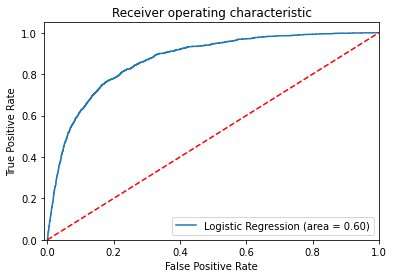

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


The area uder curve is 0.60, which means 60% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### minmax Scaler

In [ ]:

lg2 = clf.fit(X_train_mm,y_train)

In [ ]:
lg2.best_params_

{'C': 4714.8663634573895, 'penalty': 'l2'}

In [ ]:
logreg2 = LogisticRegression(C=4714.8663634573895, penalty='l2',random_state=42)
logreg2.fit(X_train_mm, y_train)
y_pred2 = logreg2.predict(X_test_mm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_mm, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(y_test, y_pred2))

Confusion Matrix:
 [[11689   277]
 [ 1082   516]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.65      0.32      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



Confusion Matrix:

11689 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
516 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
277 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
1082 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.90.

Class(0)

Precision value is 0.92 which tells that 92% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.95 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.65 which tells that 65% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.32 where it tells that 32% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.43 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

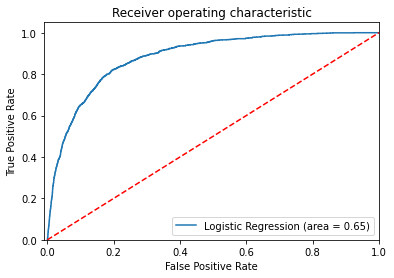

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.65, which means 65% better in distinguish a client will be subscribing to a term deposit in the financial institute

### Standard Scaled Data

In [ ]:
# Standard scaler
lg3 = clf.fit(X_train_ss,y_train)

In [ ]:
lg3.best_params_

{'C': 0.08685113737513521, 'penalty': 'l2'}

In [ ]:
logreg3 = LogisticRegression(C=0.08685113737513521, penalty='l2',random_state=42)
logreg3.fit(X_train_ss, y_train)
y_pred3 = logreg3.predict(X_test_ss)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test_ss, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(y_test, y_pred3))

Confusion Matrix:
 [[11696   270]
 [ 1083   515]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.66      0.32      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



Confusion Matrix:

11696 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value. 515 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value. 270 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value. 1083 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.90.

Class(0)

Precision value is 0.92 which tells that 92% of the correctly predicted cases actually turned out to be positive. Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model. The F1 score is 0.95 which is a weighted harmonic mean of precision and recall. Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.66 which tells that 66% of the correctly predicted cases actually turned out to be positive. Recall value is 0.32 where it tells that 32% of the actual positive cases we were able to predict correctly with our model. The F1 score is 0.43 which is a weighted harmonic mean of precision and recall. Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions.

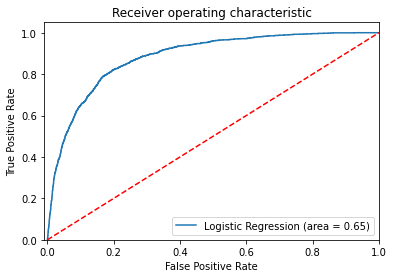

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg3.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.65, which means 65% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Data with Log Transformation

In [ ]:
lg4 = clf.fit(XT_train, yT_train)

In [ ]:
lg4.best_params_

{'C': 3.727593720314938, 'penalty': 'l2'}

In [ ]:
logreg4 = LogisticRegression(C=3.727593720314938, penalty='l2', random_state=42)
logreg4.fit(XT_train, yT_train)
y_pred4 = logreg4.predict(XT_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg4.score(XT_test, yT_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred4)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(yT_test, y_pred4))

Confusion Matrix:
 [[11697   269]
 [ 1109   489]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



Confusion Matrix:

11697 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
489 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
269 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
1109 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.90.

Class(0)

Precision value is 0.91 which tells that 91% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.94 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.65 which tells that 65% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.31 where it tells that 31% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.42 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

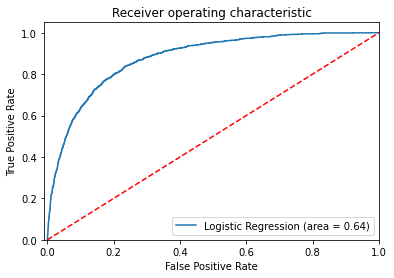

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg4.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, logreg4.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


The area uder curve is 0.64, which means 64% better in distinguish a client will be subscribing to a term deposit in the financial institute.


### Minmax Scaled Data + Log Transformation

In [ ]:
# minmax Scaler
lg5 = clf.fit(XT_train_mm,yT_train)

In [ ]:
lg5.best_params_

{'C': 3.727593720314938, 'penalty': 'l2'}

In [ ]:
logreg5 = LogisticRegression(C= 3.727593720314938, penalty='l2',random_state=42)
logreg5.fit(XT_train_mm, yT_train)
y_pred5 = logreg5.predict(XT_test_mm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg5.score(XT_test_mm, yT_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred5)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(yT_test, y_pred5))

Confusion Matrix:
 [[11697   269]
 [ 1109   489]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



Confusion Matrix:

11697 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
489 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
269 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
1109 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.90.

Class(0)

Precision value is 0.91 which tells that 91% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.94 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.65 which tells that 65% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.31 where it tells that 31% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.42 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

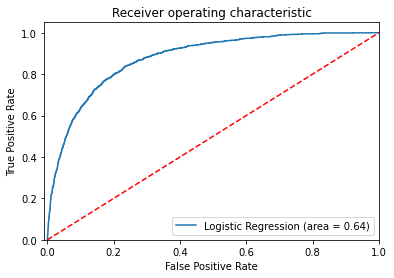

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg5.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, logreg5.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.64, which means 64% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Standard scaled data + Log Transformation

In [ ]:
# Standard scaler
lg6 = clf.fit(XT_train_ss,yT_train)

In [ ]:
lg6.best_params_

{'C': 3.727593720314938, 'penalty': 'l2'}

In [ ]:
logreg6 = LogisticRegression(C=3.727593720314938, penalty='l2',random_state=42)
logreg6.fit(XT_train_ss, yT_train)
y_pred6 = logreg6.predict(XT_test_ss)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg6.score(XT_test_ss, yT_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred6)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(yT_test, y_pred6))

Confusion Matrix:
 [[11697   269]
 [ 1109   489]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



Confusion Matrix:

11697 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
489 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
269 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
1109 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.90.

Class(0)

Precision value is 0.91 which tells that 91% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.98 where it tells that 98% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.94 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.65 which tells that 65% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.31 where it tells that 31% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.42 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

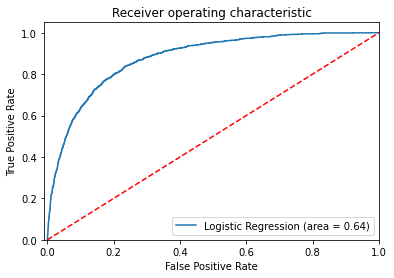

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg6.predict(XT_test_ss))
fpr, tpr, thresholds = roc_curve(yT_test, logreg6.predict_proba(XT_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.64, which means 64% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Non scaled data + SMOTE

In [ ]:
#no scaling
lg1_smote = clf.fit(X_train_smote, y_train_smote)

In [ ]:
lg1_smote.best_params_

{'C': 0.5689866029018293, 'penalty': 'l2'}

In [ ]:
logreg1_smote = LogisticRegression(C=0.5689866029018293, penalty='l2',random_state=42)
logreg1_smote.fit(X_train_smote, y_train_smote)
y_pred1_smote = logreg1_smote.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1_smote.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1_smote)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(y_test, y_pred1_smote))

Confusion Matrix:
 [[9709 2257]
 [ 347 1251]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     11966
           1       0.36      0.78      0.49      1598

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.89      0.81      0.84     13564



Confusion Matrix:

9709 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
1251 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
2257 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
347 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.81.

Class(0)

Precision value is 0.97 which tells that 97% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.81 where it tells that 81% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.88 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.36 which tells that 36% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.78 where it tells that 78% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.49 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

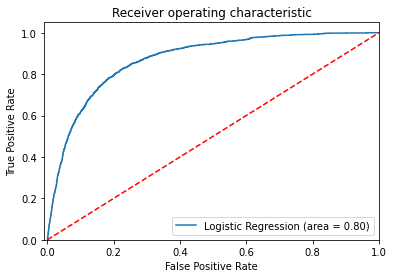

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg1_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg1_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Minmax scaled data + SMOTE

In [ ]:
#minmax
lg2_smote = clf.fit(X_train_mm_smote, y_train_smote)

In [ ]:
lg2_smote.best_params_

{'C': 109.85411419875572, 'penalty': 'l2'}

In [ ]:
logreg2_smote = LogisticRegression(C=109.85411419875572, penalty='l2', random_state=42)
logreg2_smote.fit(X_train_mm_smote, y_train_smote)
y_pred2_smote = logreg2_smote.predict(X_test_mm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2_smote.score(X_test_mm, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2_smote)
print("Confusion Matrix:\n",confusion_matrix)
print(" ")
print("Classification Report:\n",classification_report(y_test, y_pred2_smote))

Confusion Matrix:
 [[10012  1954]
 [  366  1232]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     11966
           1       0.39      0.77      0.52      1598

    accuracy                           0.83     13564
   macro avg       0.68      0.80      0.71     13564
weighted avg       0.90      0.83      0.85     13564



Confusion Matrix:

10012 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
1232 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
1954 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
366 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.83.

Class(0)

Precision value is 0.96 which tells that 96% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.84 where it tells that 84% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.90 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.39 which tells that 39% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.77 where it tells that 77% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.52 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

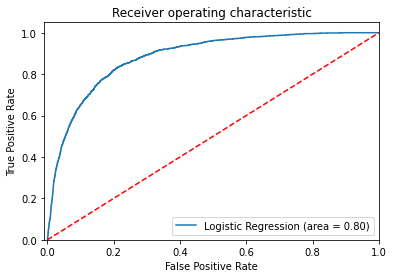

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg2_smote.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, logreg2_smote.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Standard scaled data + SMOTE

In [ ]:
#standard
lg3_smote = clf.fit(X_train_ss_smote, y_train_smote)

In [ ]:
lg3_smote.best_params_

{'C': 494.1713361323828, 'penalty': 'l2'}

In [ ]:
logreg3_smote = LogisticRegression(C=494.1713361323828, penalty='l2',random_state=42)
logreg3_smote.fit(X_train_ss_smote, y_train_smote)
y_pred3_smote = logreg3_smote.predict(X_test_ss)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3_smote.score(X_test_ss, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3_smote)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred3_smote))

Confusion Matrix:
 [[9980 1986]
 [ 360 1238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     11966
           1       0.38      0.77      0.51      1598

    accuracy                           0.83     13564
   macro avg       0.67      0.80      0.70     13564
weighted avg       0.90      0.83      0.85     13564



Confusion Matrix:

9980 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
1238 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
1986 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
360 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.83.

Class(0)

Precision value is 0.97 which tells that 97% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.83 where it tells that 83% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.89 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.39 which tells that 38% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.77 where it tells that 77% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.51 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

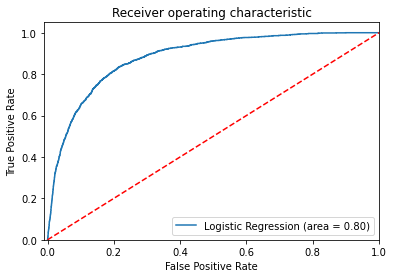

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg3_smote.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, logreg3_smote.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Non-scaled data + log transformation+ SMOTE

In [ ]:
# No scaling
lg4_smote = clf.fit(XT_train_smote, yT_train_smote)

In [ ]:
lg4_smote.best_params_

{'C': 0.0020235896477251557, 'penalty': 'l2'}

In [ ]:
logreg4_smote = LogisticRegression(C= 0.0020235896477251557, penalty='l2', random_state=42)
logreg4_smote.fit(XT_train_smote, yT_train_smote)
y_pred4_smote = logreg4_smote.predict(XT_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg4_smote.score(XT_test, yT_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred4_smote)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(yT_test, y_pred4_smote))

Confusion Matrix:
 [[9502 2464]
 [ 302 1296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     11966
           1       0.34      0.81      0.48      1598

    accuracy                           0.80     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.90      0.80      0.83     13564



Confusion Matrix:

9502 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
1296 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
2464 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
302 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.80.

Class(0)

Precision value is 0.97 which tells that 97% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.79 where it tells that 79% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.87 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.34 which tells that 34% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.81 where it tells that 77% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.48 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

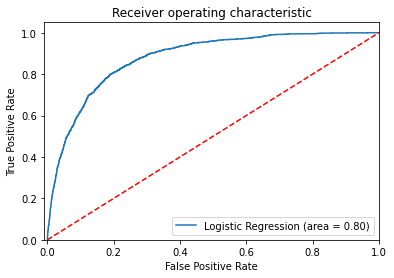

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg4_smote.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, logreg4_smote.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Minmax Scaler data + log transformation + SMOTE

In [ ]:
#Minmax logtrans
lg5_smote = clf.fit(XT_train_mm_smote, yT_train_smote)

In [ ]:
lg5_smote.best_params_

{'C': 0.0020235896477251557, 'penalty': 'l2'}

In [ ]:
logreg5_smote = LogisticRegression(C=0.0020235896477251557, penalty='l2',random_state=42)
logreg5_smote.fit(XT_train_mm_smote, yT_train_smote)
y_pred5_smote = logreg5_smote.predict(XT_test_mm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg5_smote.score(XT_test_mm, yT_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred5_smote)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(yT_test, y_pred5_smote))

Confusion Matrix:
 [[9502 2464]
 [ 302 1296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     11966
           1       0.34      0.81      0.48      1598

    accuracy                           0.80     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.90      0.80      0.83     13564



Confusion Matrix:

9502 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value.
1296 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value.
2464 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value.
302 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.80.

Class(0)

Precision value is 0.97 which tells that 97% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.79 where it tells that 79% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.87 which is a weighted harmonic mean of precision and recall.
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.34 which tells that 34% of the correctly predicted cases actually turned out to be positive.
Recall value is 0.81 where it tells that 77% of the actual positive cases we were able to predict correctly with our model.
The F1 score is 0.48 which is a weighted harmonic mean of precision and recall.
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions. 

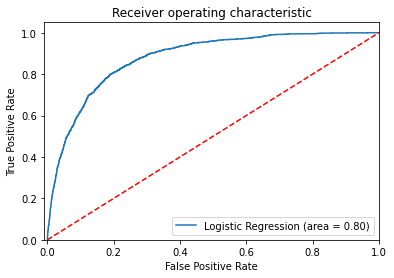

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg5_smote.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, logreg5_smote.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

### Standard scaled data + Log Transformation + SMOTE

In [ ]:
# No scaling
lg6_smote = clf.fit(XT_train_ss_smote, yT_train_smote)

In [ ]:
lg6_smote.best_params_

{'C': 0.0020235896477251557, 'penalty': 'l2'}

In [ ]:
logreg6_smote = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg6_smote.fit(XT_train_ss_smote, yT_train_smote)
y_pred6_smote = logreg6_smote.predict(XT_test_ss)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg6_smote.score(XT_test_ss, yT_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yT_test, y_pred6_smote)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(yT_test, y_pred6_smote))

Confusion Matrix:
 [[9617 2349]
 [ 330 1268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     11966
           1       0.35      0.79      0.49      1598

    accuracy                           0.80     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.89      0.80      0.83     13564



Confusion Matrix:

9617 is True Positive (TP). The predicted value matches the actual value and the actual value was positive and the model predicted a positive value. 1268 is True Negative (TN). The predicted value matches the actual value and the actual value was negative and the model predicted a negative value. 2349 is False Positive (FP) which is type 1 error. The predicted value was falsely predicted and the actual value was negative but the model predicted a positive value. 330 is False Negative (FN) which is type 2 error. The predicted value was falsely predicted and the actual value was positive but the model predicted a negative value.

Classification Report:

Accuracy is 0.80.

Class(0)

Precision value is 0.97 which tells that 97% of the correctly predicted cases actually turned out to be positive. 
Recall value is 0.80 where it tells that 80% of the actual positive cases we were able to predict correctly with our model. 
The F1 score is 0.88 which is a weighted harmonic mean of precision and recall. 
Support value is 11966 which is the number of actual occurrences of the class in the specified dataset.

Class(1)

Precision value is 0.35 which tells that 35% of the correctly predicted cases actually turned out to be positive. 
Recall value is 0.79 where it tells that 79% of the actual positive cases we were able to predict correctly with our model. 
The F1 score is 0.49 which is a weighted harmonic mean of precision and recall. 
Support value is 1598 which is the number of actual occurrences of the class in the specified dataset.

Macro avg is the simple mean of scores of all classes.

Weighted avg sum of the scores of all classes after multiplying their respective class proportions.

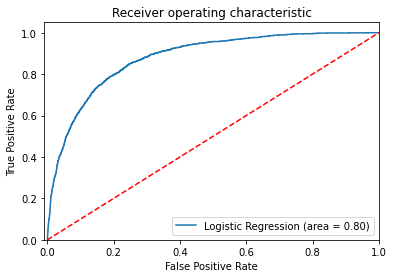

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yT_test, logreg6_smote.predict(XT_test_ss))
fpr, tpr, thresholds = roc_curve(yT_test, logreg6_smote.predict_proba(XT_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


The area uder curve is 0.80, which means 80% better in distinguish a client will be subscribing to a term deposit in the financial institute.

####  Conclusion
In short, the higher the AUC, the better the model is at predicting 0 and 1. So, the higher the AUC, the better the model is at distinguishing between clients subscirbing to a term deposit or not subscribing to a term deposit. The highest AUC is 0.80 which are the Non-scaled Data + SMOTE, Minmax scaled Data + SMOTE, Standard scaled Data + SMOTE, Non-scaled Data + Log Transformation + SMOTE, Minmax scaled Data + Log Transformation + SMOTE and Standard scaled Data + Log Transformation + SMOTE. This prove that data after oversampling with SMOTE gives a very good performance.

# **Naive Bayes**
For Naive Bayes Model, only Multinomial Naive Bayes(MNB) model suits the dataset where MNB cares about counts for multiple features that do occur. The dataset was then scaled to fullfill other model, therefore Gaussian Naive Bayes model does not suits the dataset as it support continuous valued feature.Bernoulli NB cares about counts for a single feature that do occur and counts for the same feature that do not occur. Therefore, Bernouli and Gaussian Naive Bayes Model are not included in our report.

### Multinomial Naive Bayes

###### Cross validation ( Non scaled data)

[0.92568251 0.92302831 0.92821031 0.92617874]
0.9257749677306137
Accuracy:  0.9250958419345325
Precision Score:  0.9496528613041129
Recall Score:  0.9250958419345325
F1 Score:  0.9317739943817498


Text(0.5, 55.5, 'Predicted Labels')

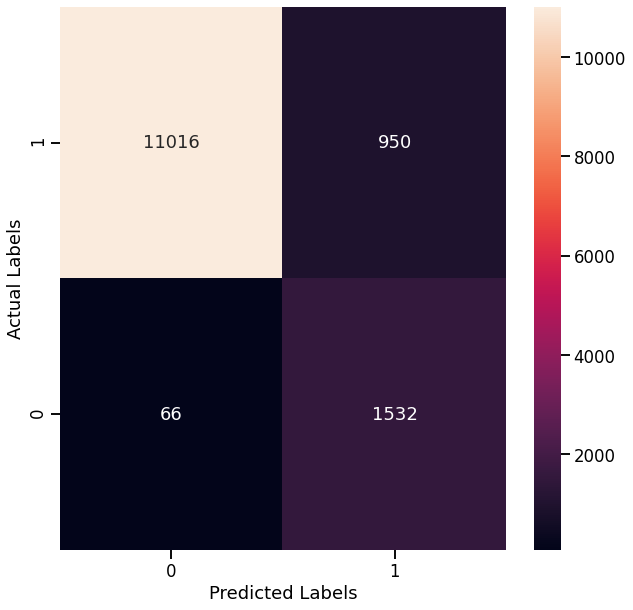

In [ ]:
X_discrete = bankData_ohc.rank(pct = True)
X_discrete.sample
X_discrete = X_discrete.applymap(lambda r: int(r*100))
X_train_mnb, X_test_mnb, y_train, y_test = train_test_split(X_discrete, y, test_size = 0.3, random_state = 42)

MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, X_train_mnb, y_train, n_jobs=cv_N, cv=cv_N)
print(scores)
print(np.mean(scores))

mnb = MNB.fit(X_train_mnb, y_train)
y_pred = mnb.predict(X_test_mnb)

# Last, the confusion matrix
labels = sorted(y_test.unique()) #get the labels
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels) #in matrics form

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1]) #reverse the labels
ax.set_ylabel('Actual Labels')
ax.set_xlabel('Predicted Labels')

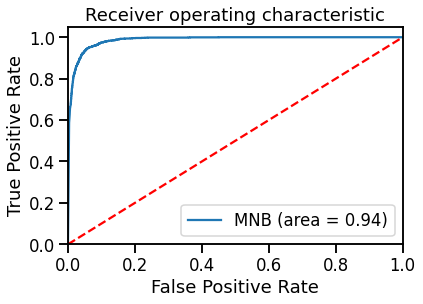

In [ ]:
mnb_roc_auc = roc_auc_score(y_test, mnb.predict(X_test_mnb))
fpr, tpr, thresholds = roc_curve(y_test, mnb.predict_proba(X_test_mnb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##### GridSearchCV ( Non scaled data)

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_mnb, y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train_mnb, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test_mnb, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.926
Test Accuracy : 0.925
Best Accuracy Through Grid Search : 0.926
Best Parameters :  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


#### Minmax Scaler

###### Cross Validation

[0.89395854 0.89496967 0.8906724  0.88952092]
0.8922803817277628
Accuracy:  0.8921409613683279
Precision Score:  0.8710623013387263
Recall Score:  0.8921409613683279
F1 Score:  0.8640264680678394


Text(0.5, 55.5, 'Predicted Labels')

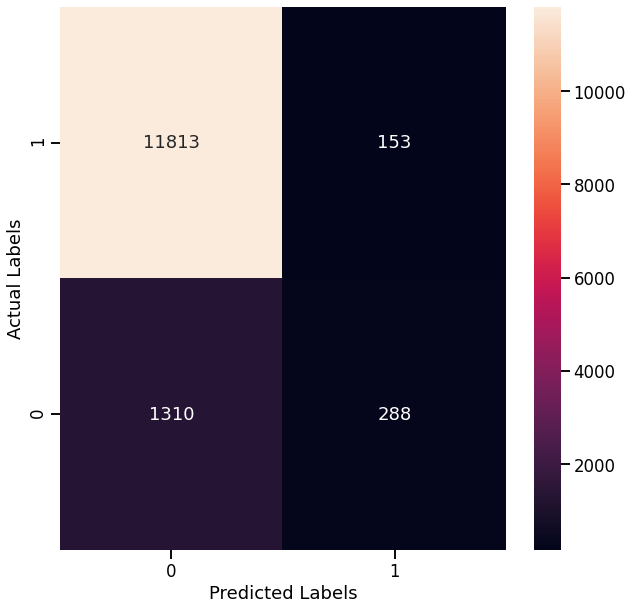

In [ ]:

MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, X_train_mm, y_train, n_jobs=cv_N, cv=cv_N)
print(scores)
print(np.mean(scores))

mnb = MNB.fit(X_train_mm, y_train)
y_pred = mnb.predict(X_test_mm)

# Last, the confusion matrix
labels = sorted(y_test.unique()) #get the labels
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), index=labels, columns=labels) #in matrics form

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1]) #reverse the labels
ax.set_ylabel('Actual Labels')
ax.set_xlabel('Predicted Labels')

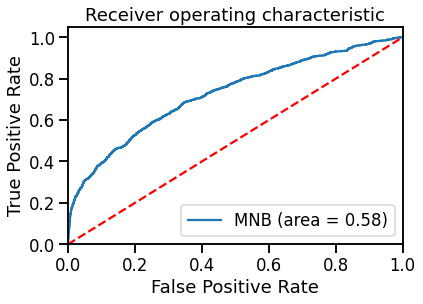

In [ ]:
mnb_roc_auc = roc_auc_score(y_test, mnb.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, mnb.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###### GridSearchCV

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_mm, y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train_mm, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test_mm, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


Train Accuracy : 0.892
Test Accuracy : 0.892
Best Accuracy Through Grid Search : 0.892
Best Parameters :  {'alpha': 0.01}


**Standard Scaler** is limited to MNB Model as the input variable may have inconsistent numbers of samples which could not be reshape. Therefore, MNB could not perform Standard Scaler using this dataset.

#### Non scaled data + SMOTE

##### Cross Validation

In [ ]:
X_train_smote_mnb, y_train_smote_mnb = sm.fit_resample(X_train_mnb, y_train)

[0.93969094 0.9420518  0.94484189 0.94298183]
0.9423916153956217
Accuracy:  0.9161751695664996
Precision Score:  0.9471475265692049
Recall Score:  0.9161751695664996
F1 Score:  0.924511060296419


Text(0.5, 55.5, 'Predicted Labels')

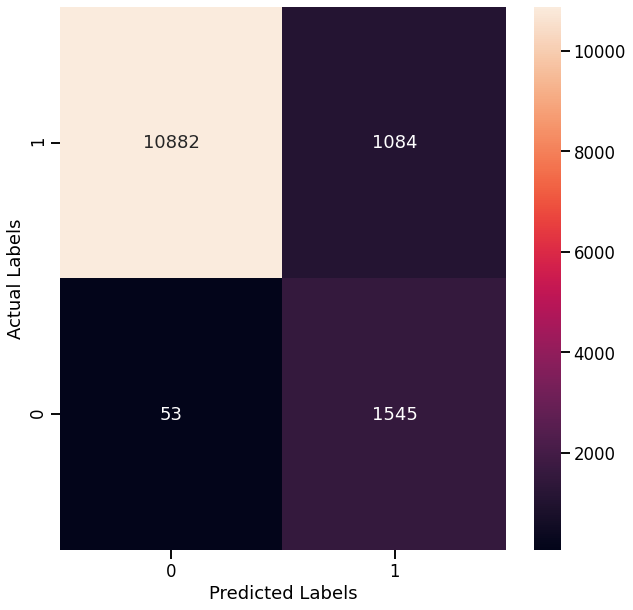

In [ ]:
MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, X_train_smote_mnb, y_train_smote_mnb, n_jobs=cv_N, cv=cv_N)
print(scores)
print(np.mean(scores))

mnb_smote = MNB.fit(X_train_smote_mnb, y_train_smote_mnb)
y_pred_smote = mnb_smote.predict(X_test_mnb)

# Last, the confusion matrix
labels = sorted(y_test.unique()) #get the labels
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_smote,labels=labels), index=labels, columns=labels) #in matrics form

print("Accuracy: ", accuracy_score(y_test, y_pred_smote))
print("Precision Score: ", precision_score(y_test, y_pred_smote, average='weighted'))
print("Recall Score: ", recall_score(y_test, y_pred_smote, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_smote, average='weighted'))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1]) #reverse the labels
ax.set_ylabel('Actual Labels')
ax.set_xlabel('Predicted Labels')

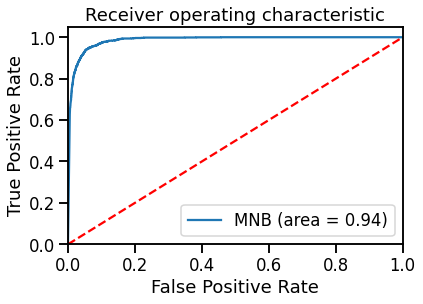

In [ ]:
mnb_smote_roc_auc = roc_auc_score(y_test, mnb_smote.predict(X_test_mnb))
fpr, tpr, thresholds = roc_curve(y_test, mnb_smote.predict_proba(X_test_mnb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnb_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###### Grid Search

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_smote_mnb, y_train_smote_mnb)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train_smote_mnb, y_train_smote_mnb))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test_mnb, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.943
Test Accuracy : 0.916
Best Accuracy Through Grid Search : 0.943
Best Parameters :  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.9s finished


#### Minmax Scaler + SMOTE

In [ ]:
mnb_mm_smote = multinomial_nb_grid.fit(X_train_mm_smote, y_train_smote)
y_pred_mnb_smote_mm = mnb_mm_smote.predict(X_test_mm)

print("Accuracy: ", accuracy_score(y_test, y_pred_mnb_smote_mm))
print("Precision Score: ", precision_score(y_test, y_pred_mnb_smote_mm))
print("Recall Score: ", recall_score(y_test, y_pred_mnb_smote_mm))
print("F1 Score: ", f1_score(y_test, y_pred_mnb_smote_mm))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy:  0.6907254497198466
Precision Score:  0.21948585007561028
Recall Score:  0.6357947434292867
F1 Score:  0.32632086076762484


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


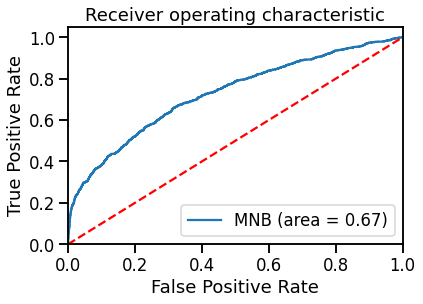

In [ ]:
mnb_smote_mm_roc_auc = roc_auc_score(y_test,mnb_mm_smote.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, mnb_mm_smote.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnb_smote_mm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

After oversampling the dataset, **Standard Scaler **are still not allowed to use as it passes negative value which is not available for MNB model.

Non scaled data + Log Transformation

###### Cross Validation

[0.89143074 0.88902932 0.88688069 0.88775123]
0.8887729951729164
Accuracy:  0.8857269242111472
Precision Score:  0.8602893297223231
Recall Score:  0.8857269242111472
F1 Score:  0.864079423322927


Text(0.5, 55.5, 'Predicted Labels')

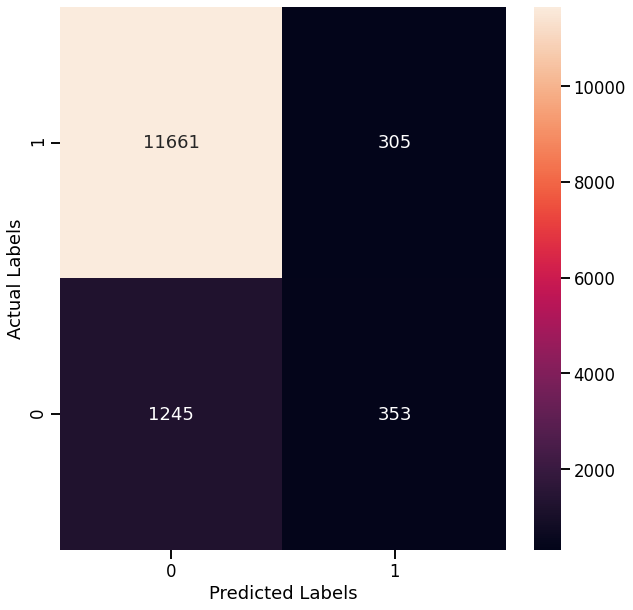

In [ ]:
MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, XT_train, yT_train, n_jobs=cv_N, cv=cv_N)
print(scores)
print(np.mean(scores))

mnbT = MNB.fit(XT_train, yT_train)
yT_pred = mnbT.predict(XT_test)

# Last, the confusion matrix
labels = sorted(yT_test.unique()) #get the labels
cm = pd.DataFrame(confusion_matrix(yT_test, yT_pred, labels=labels), index=labels, columns=labels) #in matrics form

print("Accuracy: ", accuracy_score(yT_test, yT_pred))
print("Precision Score: ", precision_score(yT_test, yT_pred, average='weighted'))
print("Recall Score: ", recall_score(yT_test, yT_pred, average='weighted'))
print("F1 Score: ", f1_score(yT_test, yT_pred, average='weighted'))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1]) #reverse the labels
ax.set_ylabel('Actual Labels')
ax.set_xlabel('Predicted Labels')

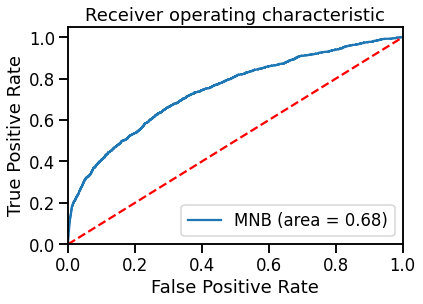

In [ ]:
mnbT_roc_auc = roc_auc_score(yT_test, mnbT.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, mnbT.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnbT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###### GridSearchCV

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(XT_train, yT_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(XT_train, yT_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(XT_test, yT_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.889
Test Accuracy : 0.886
Best Accuracy Through Grid Search : 0.889
Best Parameters :  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


#### Minmax Scaler + Log Transformation

In [ ]:
mnbT_mm = multinomial_nb_grid.fit(XT_train_mm, yT_train)
y_pred_mnbT_mm = mnbT_mm.predict(XT_test_mm)

print("Accuracy: ", accuracy_score(yT_test, y_pred_mnbT_mm))
print("Precision Score: ", precision_score(yT_test, y_pred_mnbT_mm))
print("Recall Score: ", recall_score(yT_test, y_pred_mnbT_mm))
print("F1 Score: ", f1_score(yT_test, y_pred_mnbT_mm))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy:  0.8919197876732528
Precision Score:  0.6410256410256411
Recall Score:  0.18773466833541927
F1 Score:  0.2904162633107454


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


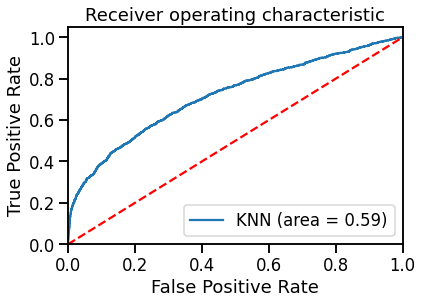

In [ ]:
mnbT_mm_roc_auc = roc_auc_score(yT_test, mnbT_mm.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, mnbT_mm.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnbT_mm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Standard Scaler + Log Transformation

#### Non scaled data + SMOTE + Log Transformation

###### Cross Validation

[0.68521963 0.69065675 0.69079983 0.69595078]
0.6906567463156388
Accuracy:  0.7240489531111767
Precision Score:  0.8544089042739826
Recall Score:  0.7240489531111767
F1 Score:  0.768782779423242


Text(0.5, 55.5, 'Predicted Labels')

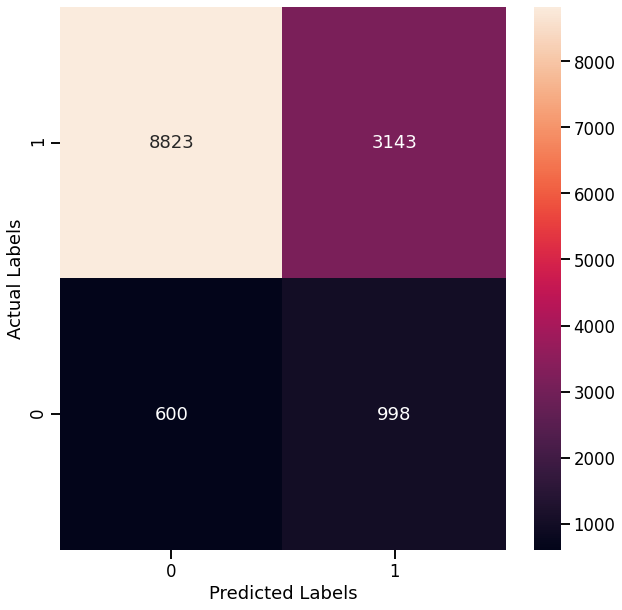

In [ ]:
MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, XT_train_smote, yT_train_smote, n_jobs=cv_N, cv=cv_N)
print(scores)
print(np.mean(scores))

mnbT = MNB.fit(XT_train_smote, yT_train_smote)
yT_pred_smote = mnbT.predict(XT_test)

# Last, the confusion matrix
labels = sorted(yT_test.unique()) #get the labels
cm = pd.DataFrame(confusion_matrix(yT_test, yT_pred_smote, labels=labels), index=labels, columns=labels) #in matrics form

print("Accuracy: ", accuracy_score(yT_test,yT_pred_smote))
print("Precision Score: ", precision_score(yT_test, yT_pred_smote, average='weighted'))
print("Recall Score: ", recall_score(yT_test, yT_pred_smote, average='weighted'))
print("F1 Score: ", f1_score(yT_test, yT_pred_smote, average='weighted'))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1]) #reverse the labels
ax.set_ylabel('Actual Labels')
ax.set_xlabel('Predicted Labels')

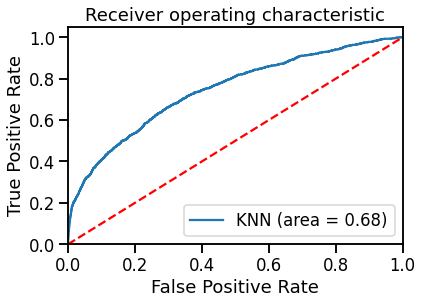

In [ ]:
mnbT_roc_auc = roc_auc_score(yT_test, mnbT.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, mnbT.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % mnbT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###### GridSearchCV

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(XT_train_smote, yT_train_smote)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(XT_train_smote, yT_train_smote))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(XT_test, yT_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy : 0.691
Test Accuracy : 0.724
Best Accuracy Through Grid Search : 0.691
Best Parameters :  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


#### Minmax Scaler + SMOTE + Log Transformation

In [ ]:
mnbT_mm_smote = multinomial_nb_grid.fit(XT_train_mm_smote, yT_train_smote)
y_pred_mnbT_mm_smote = mnbT_mm_smote.predict(XT_test_mm)

print("Accuracy: ", accuracy_score(yT_test, y_pred_mnbT_mm_smote))
print("Precision Score: ", precision_score(yT_test, y_pred_mnbT_mm_smote))
print("Recall Score: ", recall_score(yT_test, y_pred_mnbT_mm_smote))
print("F1 Score: ", f1_score(yT_test, y_pred_mnbT_mm_smote))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished


Accuracy:  0.6940430551459746
Precision Score:  0.21844660194174756
Recall Score:  0.6195244055068836
F1 Score:  0.3230016313213703


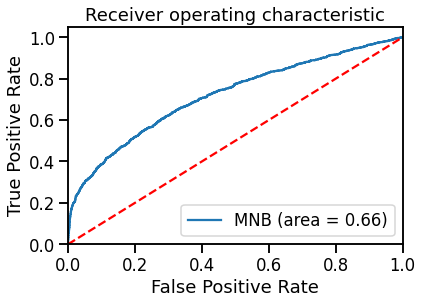

In [ ]:
mnbT_mm_smote_roc_auc = roc_auc_score(yT_test, mnbT_mm_smote.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, mnbT_mm_smote.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB (area = %0.2f)' % mnbT_mm_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

####  Non-Scaled Data

11016 is True Positive (TP). The model predicted a positive value which matches the positive actual value.

950 is False Positive(FP). The model predicted a negative value which matches the negative actual value.

66 is False Negative (FN) which is type 1 error. The model predicted a positive value which was falsely predicted which the actual value should be negative.

1532 is True Negative (TN) which is type 2 error. The model predicted a negative value which was falsely predicted which the actual value should be positive.

Accuracy:  0.9250958419345325

Precision Score:  0.9496528613041129, which tells 94% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.9250958419345325, which tells 92% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.9317739943817498, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.94, which is 94% better in distinguish a clients will subscribe to a term deposit in the financial institution.

#### MinMax Scaler*

Accuracy:  0.8921409613683279

Precision Score:  0.8710623013387263, which tells 87% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.8921409613683279, which tells 89% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.8640264680678394, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.58, which is 58% better in distinguish a clients will subscribe to a term deposit in the financial institution.

#### Oversampled Data

10882 is True Positive (TP). The model predicted a positive value which matches the positive actual value.

1094 is FP. The model predicted a negative value which matches the negative actual value.

53 is FN which is type 1 error. The model predicted a positive value which was falsely predicted which the actual value should be negative.

1545 is TN which is type 2 error. The model predicted a negative value which was falsely predicted which the actual value should be positive.

Accuracy:  0.9161751695664996

Precision Score:  0.9471475265692049, which tells 94% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.9161751695664996, which tells 91% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.924511060296419, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.94, which is 94% better in distinguish a clients will subscribe to a term deposit in the financial institution.


#### MinMax Scaler

Accuracy:  0.6907254497198466

Precision Score:  0.21948585007561028, which tells 21% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.6357947434292867, which tells 63% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.32632086076762484, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.67, which is 57% better in distinguish a clients will subscribe to a term deposit in the financial institution.

#### Transformed Data

11661 is True Positive (TP). The model predicted a positive value which matches the positive actual value.

305 is FP. The model predicted a negative value which matches the negative actual value.

1245 is FN which is type 1 error. The model predicted a positive value which was falsely predicted which the actual value should be negative.

353 is TN which is type 2 error. The model predicted a negative value which was falsely predicted which the actual value should be positive.

Accuracy:  0.8857269242111472

Precision Score:  0.8602893297223231, which tells 86% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.8857269242111472, which tells 88% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.864079423322927, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.68, which is 68% better in distinguish a clients will subscribe to a term deposit in the financial institution.


#### MinMax Scaler

Accuracy:  0.8919197876732528

Precision Score:  0.6410256410256411, which tells 64% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.18773466833541927, which tells 18% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.2904162633107454, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.59, which is 59% better in distinguish a clients will subscribe to a term deposit in the financial institution.

*Oversampled Transformed Data*

8823 is True Positive (TP). The model predicted a positive value which matches the positive actual value.

3143 is FP. The model predicted a negative value which matches the negative actual value.

600 is FN which is type 1 error. The model predicted a positive value which was falsely predicted which the actual value should be negative.

998 is TN which is type 2 error. The model predicted a negative value which was falsely predicted which the actual value should be positive.

Accuracy:  0.7240489531111767

Precision Score:  0.8544089042739826, which tells 85% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.7240489531111767, which tells 72% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.768782779423242, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.68, which is 68% better in distinguish a clients will subscribe to a term deposit in the financial institution.

#### MinMax Scaler for Oversampled Transformed Data

Accuracy:  0.6940430551459746

Precision Score:  0.21844660194174756, which tells 21% of the correctly predicted cases actually turns out to be positive.

Recall Score:  0.6195244055068836, which tells 61% of the actual positive cases were able to predict correctly with our model.

F1 Score:  0.3230016313213703, which is a weighted harmonic mean of precision and recall score.

The area under the roc-auc curve is 0.66, which is 59% better in distinguish a clients will subscribe to a term deposit in the financial institution.

After oversampling, transforming, and oversampling the transformed dataset, **Standard Scaler **are still not allowed to use as it passes negative value which is not available for MNB model.

# **Support Vector Machine**

##### Train Model with Linear SVC

The Support Vector Machine (SVM) is the only linear model which can classify data which is not linearly separable. 
Train the Support Vector Classifier without Hyper-parameter Tuning

First, we will train our model by calling standard SVC() function without doing Hyper-parameter Tuning and see its classification and confusion matrix.

The Support Vector Machine (SVM) is the only linear model which can classify data which is not linearly separable.

In [ ]:
#Import svm model
from sklearn.svm import SVC

#Create a svm Classifier
svm_clf = SVC(kernel="linear", C=10, random_state=42, max_iter=100)

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Actual
y_test

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
9016     0
380      0
7713     0
12188    0
28550    0
Name: y, Length: 13564, dtype: int64

In [ ]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy Score  : ' + str(accuracy_score(y_test,y_pred)))
# Model Precision: what percentage of positive tuples are labeled as such?
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
# Model Recall: what percentage of positive tuples are labelled as such?
print('Recall Score    : ' + str(recall_score(y_test,y_pred)))
print('F1 Score        : ' + str(f1_score(y_test,y_pred)))

Accuracy Score  : 0.12275140076673548
Precision Score : 0.11748978834014111
Recall Score    : 0.9899874843554443
F1 Score        : 0.21005111863506606


Accuracy – accuracy of the model that identifies how often is the classifier correct. The Linear model gives a relatively low accuracy score of 12.2%. This shows that the model is rather inaccurate as the data used is imbalanced data.

Precision – Accuracy of positive predictions. Precision is used as a measure of a classifier’s exactness The Linear model gives a relatively low precision score of 11.7%. This shows that only 11.7% of the predicted cases are actually positive.

Recall – Ability of a classifier to identify all positive instances. Recall is a measure of the classifier’s completeness The Linear SVC has a very high recall score of 98.99% which tells thatthe classifier was able to find 98.99% of the positive values.

F1 score – Weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. The F1 score of the linear SVC classifier is 21%, which is also rather low and shows that the model has high false positives and high false negatives.

Overall, it shows that the Linear kernel SVM is a not a good classifier as the data used is imbalanced.

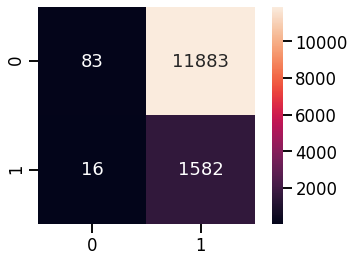

In [ ]:
cm = confusion_matrix(y_test, y_pred)
names = np.unique(y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)

The confusion matrix above compares the actual target values with those predicted by the Linear SVM model.

True Positive(TP) : 1582 

1582 predicted values matches the actual value.


False Positive(FP): 11883

The model falsely predicts 11883 negative value as postive. This is known as a Type 1 error.


False Negative(FN): 16

The model falsely predicts 16 positive value as negative. This is known as a Type 2 error.


True Negative(TN) : 83

The model correctly predicts 83 negative values which matches the negative actual values.





Overall, The model has a rather high Type 1 error. This is due to the data being imbalanced. With that, scaling is done to the data to improve the accuracy. On top of that, GridSearch is used to find optimal hyper-parameters and hence improve the accuracy/prediction results.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.01      0.01     11966
           1       0.12      0.99      0.21      1598

    accuracy                           0.12     13564
   macro avg       0.48      0.50      0.11     13564
weighted avg       0.75      0.12      0.04     13564



#### Grid Search CV

Hyperparameters cannot be directly learned and are commonly chosen by human based on some intuition or hit and trial before the actual training begins. 

These parameters exhibits their importance by improving performance of the model such as complexity or learning rate of the model. Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem.

SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very tedious task to solve. However, it can be found by just trying all combinations and see what parameters work best, which is relatively tedious. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations through a method called GridsearchCV.

GridSearchCV takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

GridSearchCV searching method finds optimal hyper-parameters and hence improve the accuracy/prediction results.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'probability': [True],'kernel': ['linear','rbf']}

svmgrid = GridSearchCV(SVC(random_state = 42, max_iter=100), param_grid, refit = True, verbose = 3)

In [ ]:
#fitting the model for gridsearch with default RBF kernel
svm = svmgrid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.868, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.126, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.127, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.121, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.136, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   3.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   3.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   2.9s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  4.8min finished


In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

In [ ]:
# print best parameter after tuning
print(svm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm.best_estimator_.get_params())

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Using GridSearch, it is found that the best hyperparameter for the data is where C= 10 and Gamma = 1 using the RBF kernel. This will help to tune the hyperparameters and make the prediction of results more accurate when fitting the data into the SVM model.

##### Fit MinMax Scaled data into Model

MinMax Scaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. From here we fit the MinMax Scaled Data into the SVM model to train the model and find the optimal hyperparameters.


In [ ]:
svm_mm = svmgrid.fit(X_train_mm,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.187, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.161, total=   2.0s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.153, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.258, total=   1.9s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.176, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.848, total=   4.4s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.879, total=   3.9s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.877, total=   3.8s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.879, total=   4.5s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  7.1min finished


In [ ]:
y_pred_svm_mm = svm.predict(X_test_mm)
y_pred_svm_prob_mm = svm.predict_proba(X_test_mm)

In [ ]:
print(svm_mm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm_mm.best_estimator_.get_params())

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svm_mm.best_score_

0.88242166690754

GridSearchCV best scores come from a cross-validation (CV) in your training set. It is the mean cross-validated score of the best_estimator. The mean value of the score is 88.24% in each one of the 5 CV folds.

In [ ]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy Score  : ' + str(accuracy_score(y_test, y_pred_svm_mm)))
# Model Precision: what percentage of positive tuples are labeled as such?
print('Precision Score : ' + str(precision_score(y_test, y_pred_svm_mm)))
# Model Recall: what percentage of positive tuples are labelled as such?
print('Recall Score    : ' + str(recall_score(y_test, y_pred_svm_mm)))
print('F1 Score        : ' + str(f1_score(y_test, y_pred_svm_mm)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(y_test, y_pred_svm_prob_mm[:,1])))

Accuracy Score  : 0.8821881450899439
Precision Score : 0.0
Recall Score    : 0.0
F1 Score        : 0.0
roc-auc         : 0.500


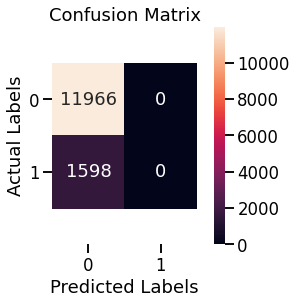

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm_mm), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

The confusion matrix above compares the actual target values with those predicted by the RBF kernel SVM model with MinMax Scaled data.


True Negative(TN) : 11966

The model correctly predicts 11966 negative values which matches the negative actual values.


False Positive(FP): 0

The model falsely predicts 0 negative value as postive. This is known as a Type 1 error.


False Negative(FN): 1598

The model falsely predicts 1598 positive value as negative. This is known as a Type 2 error.


True Positive(TP) : 0

0 predicted values matches the actual value.


Overall, the model correctly predicts 11966 negative values whereas none predicted positive values matches the actual value. This is because of the skewed imbalance data that lean towards negative values.

In [ ]:
print(classification_report(y_test, y_pred_svm_mm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



The MinMax Scaled data - fitted SVM model gives a relatively high accuracy score of 88%.

Precision – Accuracy of positive predictions. Precision is used as a measure of a classifier’s exactness
The MinMax Scaled data - fitted SVM model gives a very low precision score of 7.7%. This shows that only 11.7% of the predicted cases are actually positive.

Recall – Ability of a classifier to identify all positive instances. Recall is a measure of the classifier’s completeness
The  has a very low recall score of 0.8% which tells that the classifier was only able to find 0.8% of the positive values. 


The F1 score of the RBF classifier is 1.5%, which is very low and shows that the model has high false positives and high false  negatives compared to other classifier models.


The area under the roc-auc curve is 0.558, which is 55.8% good in distinguishing if clients will subscribe to a term deposit in the financial institution.


Overall, it shows that MinMax Scaled data is still a highly imbalanced data as it gives really low precision, recall, and F1 score with a high accuracy score. This shows that the model might be susceptible to other types of error. A situation of Low Precision emerges when very few of your positive predictions are true, and Low Recall occurs if most of your positive values are never predicted.



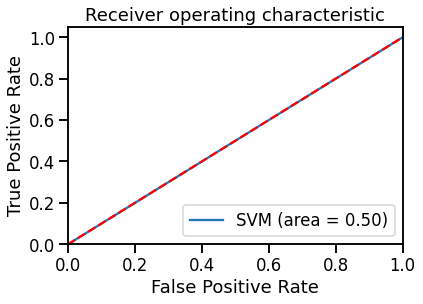

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Fit Standard Scaled data into Model

In [ ]:
svm_ss = svmgrid.fit(X_train_ss,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.880, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.881, total=   3.4s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.879, total=   3.4s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   3.3s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.882, total=   3.4s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  6.0min finished


In [ ]:
y_pred_svm_ss = svm.predict(X_test_ss)
y_pred_svm_prob_ss = svm.predict_proba(X_test_ss)

In [ ]:
print(svm_ss.best_params_)
print(svm_ss.best_estimator_.get_params())

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svm_ss.best_score_

0.8819478131333062

The mean value of the score is 88.19% in each one of the 5 CV folds.

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(y_test, y_pred_svm_ss)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_svm_ss)))
print('Recall Score    : ' + str(recall_score(y_test, y_pred_svm_ss)))
print('F1 Score        : ' + str(f1_score(y_test, y_pred_svm_ss)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(y_test, y_pred_svm_prob_ss[:,1])))

Accuracy Score  : 0.8771011501032144
Precision Score : 0.11235955056179775
Recall Score    : 0.006257822277847309
F1 Score        : 0.01185536455245999
roc-auc         : 0.649


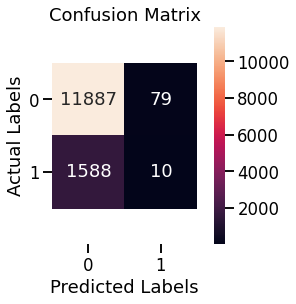

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm_ss), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

The confusion matrix above compares the actual target values with those predicted by the RBF kernel SVM model with Standard Scaled data.


True Negative(TN) : 11887

The model correctly predicts 11887 negative values which matches the negative actual values.


False Positive(FP): 79

The model falsely predicts 79 negative value as positive. This is known as a Type 1 error.


False Negative(FN): 1588

The model falsely predicts 1588 positive value as negative. This is known as a Type 2 error.


True Positive(TP) : 10

10 predicted values matches the actual value.


Overall, the model correctly predicts a total of  11897 values that matches the actual values whereas 1667 values predicted did not match the actual value.

In [ ]:
print(classification_report(y_test, y_pred_svm_ss))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11966
           1       0.11      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.50      0.50      0.47     13564
weighted avg       0.79      0.88      0.83     13564



In [ ]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area under curve in the Standard Scaled Data fitted model is 0.649. 

The Standard Scaled data - fitted SVM model gives a relatively high accuracy score of 87.7.

Precision – Accuracy of positive predictions. Precision is used as a measure of a classifier’s exactness
The MinMax Scaled data - fitted SVM model gives a very low precision score of 11.2%. This shows that only 11.2% of the predicted cases are actually positive.

Recall – Ability of a classifier to identify all positive instances. Recall is a measure of the classifier’s completeness
The  has a very low recall score of 0.6% which tells that the classifier was only able to find 0.6% of the positive values. 


The F1 score of the RBF classifier is 1.18%, which is very low and shows that the model has high false positives and high false  negatives compared to other classifier models.


The area under the roc-auc curve is 0.649, which is 64.9% good in distinguishing if clients will subscribe to a term deposit in the financial institution.


Overall, MinMax Scaled and standarad scaled data- fitted model gives similar outcome. 

#### Fit SMOTE data (balanced data) into Model

In [ ]:
svm_smote = svmgrid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.501, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   1.3s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.501, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.498, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.499, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.502, total=   7.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.503, total=   6.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.503, total=   6.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.504, total=   6.7s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 10.3min finished


In [ ]:
y_pred_svm_smote = svm.predict(X_test)
y_pred_svm_prob_smote = svm.predict_proba(X_test)

In [ ]:
print(svm_smote.best_params_)
print(svm_smote.best_estimator_.get_params())

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svm_smote.best_score_

0.5103200598335176

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(y_test, y_pred_svm_smote)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_svm_smote)))
print('Recall Score    : ' + str(recall_score(y_test, y_pred_svm_smote)))
print('F1 Score        : ' + str(f1_score(y_test, y_pred_svm_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(y_test, y_pred_svm_prob_smote[:,1])))

Accuracy Score  : 0.11884399882040696
Precision Score : 0.11793357933579336
Recall Score    : 1.0
F1 Score        : 0.21098494850805385
roc-auc         : 0.501


There is a high accuracy score of 11% but precision, recall and F1 score = 21% shows that this is a very bad classifier. 

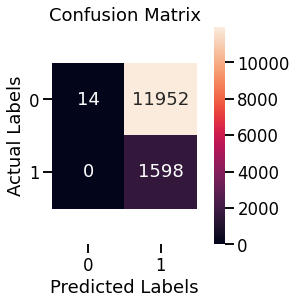

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_smote))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     11966
           1       0.12      1.00      0.21      1598

    accuracy                           0.12     13564
   macro avg       0.56      0.50      0.11     13564
weighted avg       0.90      0.12      0.03     13564



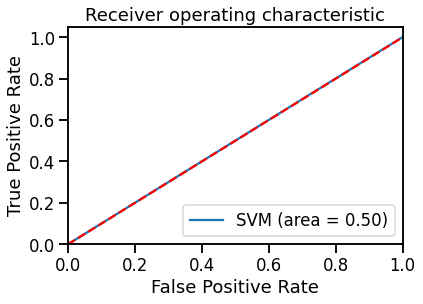

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit SMOTE (MinMax Scaled) Data into SVM

In [ ]:
svm_mm_smote = svmgrid.fit(X_train_mm_smote,y_train_mm_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.461, total=   4.3s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.543, total=   4.4s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.481, total=   4.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.468, total=   4.3s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.490, total=   4.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.492, total=   7.5s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.496, total=   7.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.496, total=   7.5s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.499, total=   8.1s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 14.9min finished


In [ ]:
y_pred_svm_mm_smote = svm.predict(X_test_mm)
y_pred_svm_prob_mm_smote = svm.predict_proba(X_test_mm)

In [ ]:
print(svm_mm_smote.best_params_)
print(svm_mm_smote.best_estimator_.get_params())

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svm_mm_smote.best_score_

0.5357713490337085

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(y_test, y_pred_svm_mm_smote)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_svm_mm_smote)))
print('Recall Score    : ' + str(recall_score(y_test, y_pred_svm_mm_smote)))
print('F1 Score        : ' + str(f1_score(y_test, y_pred_svm_mm_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(y_test, y_pred_svm_prob_mm_smote[:,1])))

Accuracy Score  : 0.6990563255676792
Precision Score : 0.1218026796589525
Recall Score    : 0.2503128911138924
F1 Score        : 0.16386726751331424
roc-auc         : 0.513


The MinMax SMOTE data - fitted SVM model gives a relatively moderate accuracy score of 69.9%.

The MinMax SMOTE Scaled data - fitted SVM model gives a very low precision score of 12.1%. This shows that only 12.1% of the predicted cases are actually positive.

This classifier has a very low recall score of 2.5% which tells that the classifier was only able to find 2.5% of the positive values. 


The F1 score of the RBF classifier is 0.16%, which is very low and shows that the model has high false positives and high false  negatives compared to other classifier models.


The area under the roc-auc curve is 0.513, which is 51.3% good in distinguishing if clients will subscribe to a term deposit in the financial institution.

This also gives bad prediction outcome. 

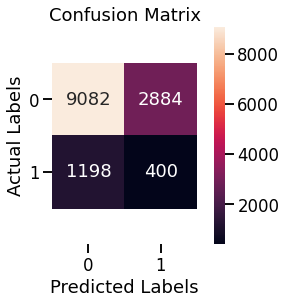

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm_mm_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

The confusion matrix above compares the actual target values with those predicted by the RBF kernel SVM model.

True Positive(TP) : 400 

400 predicted values matches the actual value.


False Positive(FP): 2884

The model falsely predicts 2884 negative value as postive. This is known as a Type 1 error.


False Negative(FN): 1198

The model falsely predicts 1198 positive value as negative. This is known as a Type 2 error.


True Negative(TN) : 9082

The model correctly predicts 9082 negative values which matches the negative actual values.



Overall, the oversampled data predicts rather inaccurately due to the high false positives and high false negatives.
However, it correctly predict 9482 values that matches the actual values.


In [ ]:
print(classification_report(y_test, y_pred_svm_mm_smote))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     11966
           1       0.12      0.25      0.16      1598

    accuracy                           0.70     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.70      0.74     13564



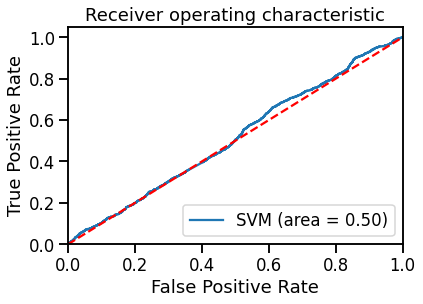

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test_mm))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit SMOTE (Standard Scaled) Data into SVM

In [ ]:
svm_ss_smote = svmgrid.fit(X_train_ss_smote,y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.540, total=   3.4s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.501, total=   3.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   3.1s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   4.3s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   4.5s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.501, total=   7.4s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.502, total=   7.2s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.504, total=   7.2s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.507, total=   7.3s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 13.0min finished


In [ ]:
y_pred_svm_ss_smote = svm.predict(X_test_ss)
y_pred_svm_prob_ss_smote = svm.predict_proba(X_test_ss)

In [ ]:
print(svm_ss_smote.best_params_)
print(svm_ss_smote.best_estimator_.get_params())

{'C': 100, 'gamma': 1, 'kernel': 'linear', 'probability': True}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svm_ss_smote.best_score_

0.57733570896994

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(y_test, y_pred_svm_ss_smote)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_svm_ss_smote)))
print('Recall Score    : ' + str(recall_score(y_test, y_pred_svm_ss_smote)))
print('F1 Score        : ' + str(f1_score(y_test, y_pred_svm_ss_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(y_test, y_pred_svm_prob_ss_smote[:,1])))

Accuracy Score  : 0.1393394278973754
Precision Score : 0.10957842529448233
Recall Score    : 0.8848560700876095
F1 Score        : 0.1950075851606675
roc-auc         : 0.562


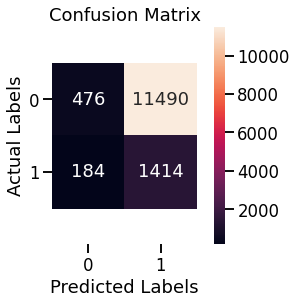

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm_ss_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm_ss_smote))

              precision    recall  f1-score   support

           0       0.72      0.04      0.08     11966
           1       0.11      0.88      0.20      1598

    accuracy                           0.14     13564
   macro avg       0.42      0.46      0.14     13564
weighted avg       0.65      0.14      0.09     13564



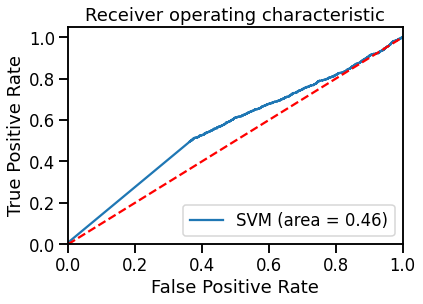

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test_ss))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit Transformed Trained data into SVM

In [ ]:
svmT = svmgrid.fit(XT_train,yT_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.124, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.605, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.215, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.142, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.158, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   3.2s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.883, total=   2.9s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.1min finished


In [ ]:
y_pred_svmT = svmT.predict(XT_test)
y_pred_svmT_prob = svmT.predict_proba(XT_test)

In [ ]:
print(svmT.best_params_)
print(svmT.best_estimator_.get_params())

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT.best_score_

0.8829904971148881

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob[:,1])))

Accuracy Score  : 0.8818195222648186
Precision Score : 0.4074074074074074
Recall Score    : 0.00688360450563204
F1 Score        : 0.013538461538461541
roc-auc         : 0.641


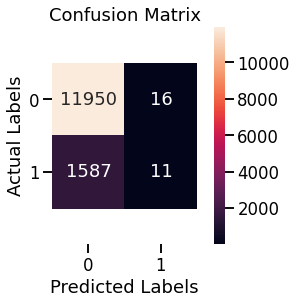

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.41      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.65      0.50      0.48     13564
weighted avg       0.83      0.88      0.83     13564



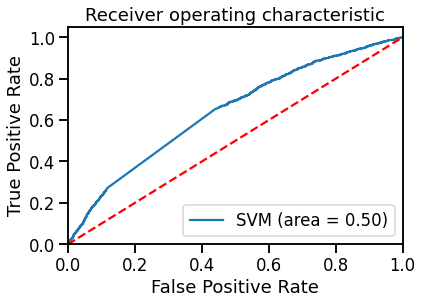

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit Transformed MinMax Scaled data into SVM

In [ ]:

svmT_mm = svmgrid.fit(XT_train_mm,yT_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.348, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.250, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.260, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.163, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.381, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.871, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.882, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.845, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.881, total=   2.7s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.6min finished


In [ ]:
y_pred_svmT_mm = svmT.predict(XT_test_mm)
y_pred_svmT_prob_mm = svmT.predict_proba(XT_test_mm)

In [ ]:
print(svmT_mm.best_params_)
print(svmT_mm.best_estimator_.get_params())

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT_mm.best_score_

0.8792616799171895

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT_mm)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT_mm)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT_mm)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT_mm)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob_mm[:,1])))

Accuracy Score  : 0.8821881450899439
Precision Score : 0.0
Recall Score    : 0.0
F1 Score        : 0.0
roc-auc         : 0.500


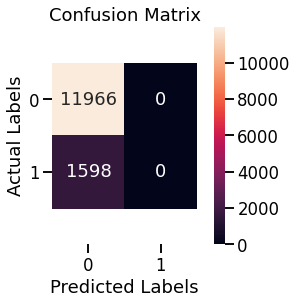

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT_mm), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT_mm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



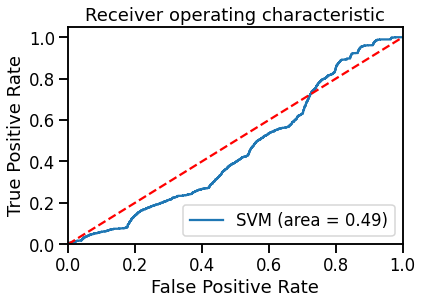

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Fit Transformed Standard Scaled data into SVM

In [ ]:
svmT_ss = svmgrid.fit(XT_train_ss,yT_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.181, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.117, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.135, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.121, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.879, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.878, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.882, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.876, total=   2.8s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.3min finished


In [ ]:
y_pred_svmT_ss = svmT.predict(XT_test_ss)
y_pred_svmT_prob_ss = svmT.predict_proba(XT_test_ss)

In [ ]:
print(svmT_ss.best_params_)
print(svmT_ss.best_estimator_.get_params())

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT_ss.best_score_

0.8813473274430471

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT_ss)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT_ss)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT_ss)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT_ss)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob_ss[:,1])))

Accuracy Score  : 0.8812297257446181
Precision Score : 0.3142857142857143
Recall Score    : 0.00688360450563204
F1 Score        : 0.013472137170851196
roc-auc         : 0.638


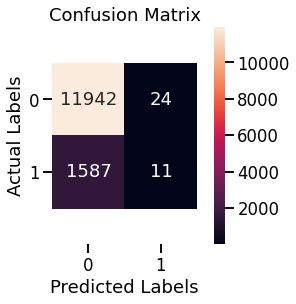

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT_ss), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT_ss))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.31      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.60      0.50      0.48     13564
weighted avg       0.82      0.88      0.83     13564



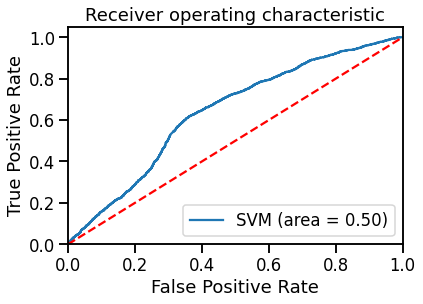

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test_ss))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit Transformed SMOTE data into SVM

In [ ]:
svmT_smote = svmgrid.fit(XT_train_smote,yT_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.563, total=   3.0s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.472, total=   2.9s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   2.6s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.481, total=   2.8s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.700, total=   3.3s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.519, total=   7.0s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.512, total=   6.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.508, total=   6.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.511, total=   6.1s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 11.3min finished


In [ ]:
y_pred_svmT_smote = svm.predict(XT_test)
y_pred_svmT_prob_smote = svm.predict_proba(XT_test)

In [ ]:
print(svmT_smote.best_params_)
print(svmT_smote.best_estimator_.get_params())

{'C': 10, 'gamma': 1, 'kernel': 'linear', 'probability': True}
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT_smote.best_score_

0.5440158253723165

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT_smote)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT_smote)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT_smote)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob_smote[:,1])))

Accuracy Score  : 0.5542612798584489
Precision Score : 0.14221364221364222
Recall Score    : 0.5531914893617021
F1 Score        : 0.22626055797286923
roc-auc         : 0.497


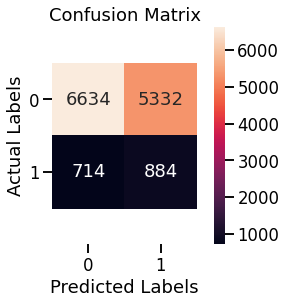

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT_smote))

              precision    recall  f1-score   support

           0       0.90      0.55      0.69     11966
           1       0.14      0.55      0.23      1598

    accuracy                           0.55     13564
   macro avg       0.52      0.55      0.46     13564
weighted avg       0.81      0.55      0.63     13564



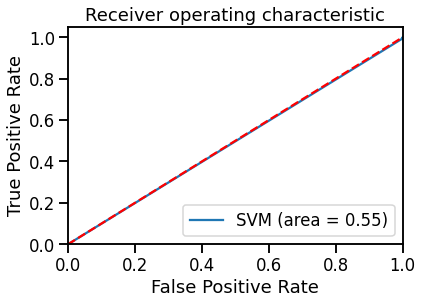

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit Transformed SMOTE (MinMax) data into SVM

In [ ]:
svmT_mm_smote = svmgrid.fit(XT_train_mm_smote,yT_train_mm_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.499, total=   3.1s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.519, total=   3.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.515, total=   3.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.540, total=   3.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.504, total=   3.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.499, total=   6.1s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.500, total=   6.5s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.501, total=   6.2s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.499, total=   6.5s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 12.5min finished


In [ ]:
y_pred_svmT_mm_smote = svm.predict(XT_test_mm)
y_pred_svmT_prob_mm_smote = svm.predict_proba(XT_test_mm)

In [ ]:
print(svmT_mm_smote.best_params_)
print(svmT_mm_smote.best_estimator_.get_params())

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT_mm_smote.best_score_

0.5693237587720701

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT_mm_smote)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT_mm_smote)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT_mm_smote)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT_mm_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob_mm_smote[:,1])))

Accuracy Score  : 0.13093482748451785
Precision Score : 0.11869480616674151
Recall Score    : 0.9924906132665833
F1 Score        : 0.21203208556149733
roc-auc         : 0.611


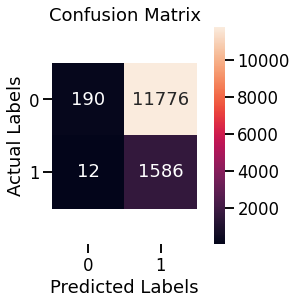

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT_mm_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT_mm_smote))

              precision    recall  f1-score   support

           0       0.94      0.02      0.03     11966
           1       0.12      0.99      0.21      1598

    accuracy                           0.13     13564
   macro avg       0.53      0.50      0.12     13564
weighted avg       0.84      0.13      0.05     13564



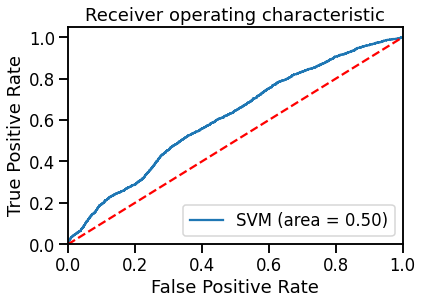

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test_mm))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test_mm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

#### Fit Transformed SMOTE (Standard Scaled) data into SVM

In [ ]:
svmT_ss_smote = svmgrid.fit(XT_train_ss_smote,yT_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   3.0s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.501, total=   3.1s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   3.3s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.545, total=   3.2s
[CV] C=0.1, gamma=1, kernel=linear, probability=True .................
[CV]  C=0.1, gamma=1, kernel=linear, probability=True, score=0.500, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.509, total=   6.0s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.507, total=   6.6s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.503, total=   6.2s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.510, total=   6.7s
[CV] C=0.1, 

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 12.2min finished


In [ ]:
y_pred_svmT_ss_smote = svm.predict(XT_test_ss)
y_pred_svmT_prob_ss_smote = svm.predict_proba(XT_test_ss)

In [ ]:
print(svmT_ss_smote.best_params_)
print(svmT_ss_smote.best_estimator_.get_params())

{'C': 10, 'gamma': 1, 'kernel': 'linear', 'probability': True}
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': 100, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
svmT_ss_smote.best_score_

0.5693955710203703

In [ ]:
print('Accuracy Score  : ' + str(accuracy_score(yT_test, y_pred_svmT_ss_smote)))
print('Precision Score : ' + str(precision_score(yT_test, y_pred_svmT_ss_smote)))
print('Recall Score    : ' + str(recall_score(yT_test, y_pred_svmT_ss_smote)))
print('F1 Score        : ' + str(f1_score(yT_test, y_pred_svmT_ss_smote)))
print('roc-auc         : {:.3f}'.format(roc_auc_score(yT_test, y_pred_svmT_prob_ss_smote[:,1])))

Accuracy Score  : 0.4407254497198467
Precision Score : 0.1321867321867322
Recall Score    : 0.6733416770963705
F1 Score        : 0.22098993633189568
roc-auc         : 0.583


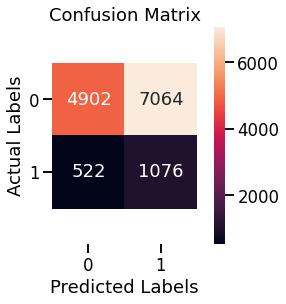

In [ ]:
plt.title("Confusion Matrix")
ax = sns.heatmap(confusion_matrix(yT_test, y_pred_svmT_ss_smote), annot = True, fmt = 'd', cbar = True, square = True, xticklabels = names, yticklabels = names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
print(classification_report(yT_test, y_pred_svmT_ss_smote))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56     11966
           1       0.13      0.67      0.22      1598

    accuracy                           0.44     13564
   macro avg       0.52      0.54      0.39     13564
weighted avg       0.81      0.44      0.52     13564



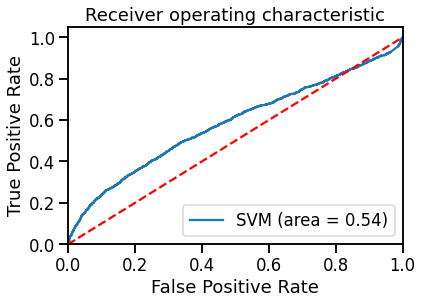

In [ ]:
svm_roc_auc = roc_auc_score(yT_test, svm.predict(XT_test_ss))
fpr, tpr, thresholds = roc_curve(yT_test, svm.predict_proba(XT_test_ss)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion
By comparing the area under curve, it is shown that all fitted model gives value lower than 0.7 with low accuracy score. This means the SVM model does give a good prediction result compared to other supervised learning models. 

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

# **Result & Discussion**
In all our suggested models, we applied oversampling, minmax scaler and standard scaler on the non-scaled datasets and transformed datasets.

By training the model with different scaled data and fitting the data into the model, we conclude that in this proposed project, the highest AUC score achieved was 0.8 by Random Forest model with the oversampled and transformed datasets.
Meanwhile, in Logistic Regression, after oversampling no matter non-scaled data or transformed datasets, also achieved the AUC score of 0.8.

Due to the same AUC score achieved in both random forest model and logistics regression model, we decide to compare separate F1-scores, which is an accuracy measurement commonly used on uneven data. Based on the overall confusion matrix, we concluded that Logistic Regression is the model to predict a client will subscribe to a tern deposit in the financial institution as it give the higest F1-score. The best F1-score and accuracy we have in the Logistic Regression Model is achieved by applying the Oversampling and MinMax Scaler to the Non-Scaled Data to achieve the best prediction outcome in predicting the likelihood of clients to subscribe to the term deposits.



Logistics Regression is most optimally used on the data set chosen in our proposed project as it is the most straightforward to train, apply and interpret. This model provides efficient model training that saves up a lot of time compared to other models such as the Support Vector machine models that may take up to hours to train the model with big datasets. Since our dataset used is considered relatively larger, the Logistic Regression model is more suitable for training the model as it does not require high computational power and It classifies unknown data very quickly. With an imbalanced dataset, it is difficult to obtain the most accurate prediction result. However, The logistic regression model takes into account the predicted parameters by giving inference about the importance of each feature in our dataset to ease the process of finding out significant relationships between each feature. 

Moreover, This algorithm allows models to be updated easily to reflect new data, unlike decision trees or support vector machines. The update can be done using stochastic gradient descent or GridSearchCV to train and fit new data into the model.Logistic Regression outputs well-calibrated probabilities along with classification results. This is an advantage over models that only give the final classification as results. If a training example has a 95% probability for a class, and another has a 55% probability for the same class, we get an inference about which training examples are more accurate for the formulated problem. 

Overfitting is less common in logistic regression, but it can happen in high-dimensional datasets such as the one used in our proposed project. To prevent over-fitting in these cases, regularisation (L1 and L2) techniques are used. Rather than straight away starting with a complex model, logistic regression is sometimes used as a benchmark model to measure performance, as it is relatively quick and easy to implement. Logistic Regression proves to be very efficient when the dataset has features that are linearly separable. Due to its simple probabilistic interpretation, the training time of logistic regression algorithms comes out to be far less than most complex algorithms, such as an Artificial Neural Network. 

On another hand, Logistics regression  attempts to predict precise probabilistic outcomes based on independent features. On high dimensional datasets, this may lead to the model being over-fit on the training set, which means overstating the accuracy of predictions on the training set and thus the model may not be able to predict accurate results on the test set. This usually happens in the case when the model is trained on little training data with lots of features. So on high dimensional datasets, regularization techniques are used to avoid over-fitting, where very high regularization factors may lead to the model being under-fit on the training data. 

Not only that, Logistic regression has limitations on non-linear problems as it has a linear decision surface.  The assumption of linearity between the dependent and independent variables is also a major limitation. Hence prediction accuracy is affected as the data set used in this proposed model is non-linear. To solve that, the transformation of non linear features is required which can be done by increasing the number of features such that the data becomes linearly separable in higher dimensions.

Furthermore, probabilistic predictions made by the model may be incorrect and the model's predictive value may degrade if irrelevant features are used to build the model. Hence, in our proposed model, irrelevant features such as date and month are dropped to improve the accuracy of the prediction outcome. This algorithm is also sensitive to outliers if there are data values that deviate from the expected range in the dataset which may lead to incorrect results. 

It is required that each training example be independent of all the other examples in the dataset. If they are related in some way, then the model will try to give more importance to those specific training examples. So, the training data should not come from matched data or repeated measurements. For example, some scientific research techniques rely on multiple observations on the same individuals. This technique can't be used in such cases.

# **Conclusion**
In a nutshell, Logistic Regression model is the most optimal model to be used in our proposed project as the dataset we have chosen is relatively large and Logistic regression model requires a large dataset and also sufficient training examples for all the categories it needs to identify.  It is also proven to give the highest prediction accuracy compared to other supervised learning models such as KNN, SVM and so on.